In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


Figure 3a

In [21]:
excel_file = pd.ExcelFile(r'overall.xlsx')
sheet_names = excel_file.sheet_names
sheet_names
df = excel_file.parse('Sheet1')

<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\p'
C:\Users\SSL\AppData\Local\Temp\ipykernel_8604\1508108047.py:39: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(mean_fpr, mean_tpr, color='orangered', lw=2, label='Mean AUC = %0.3f $\pm$ %0.3f' % (mean_auc, std_auc))


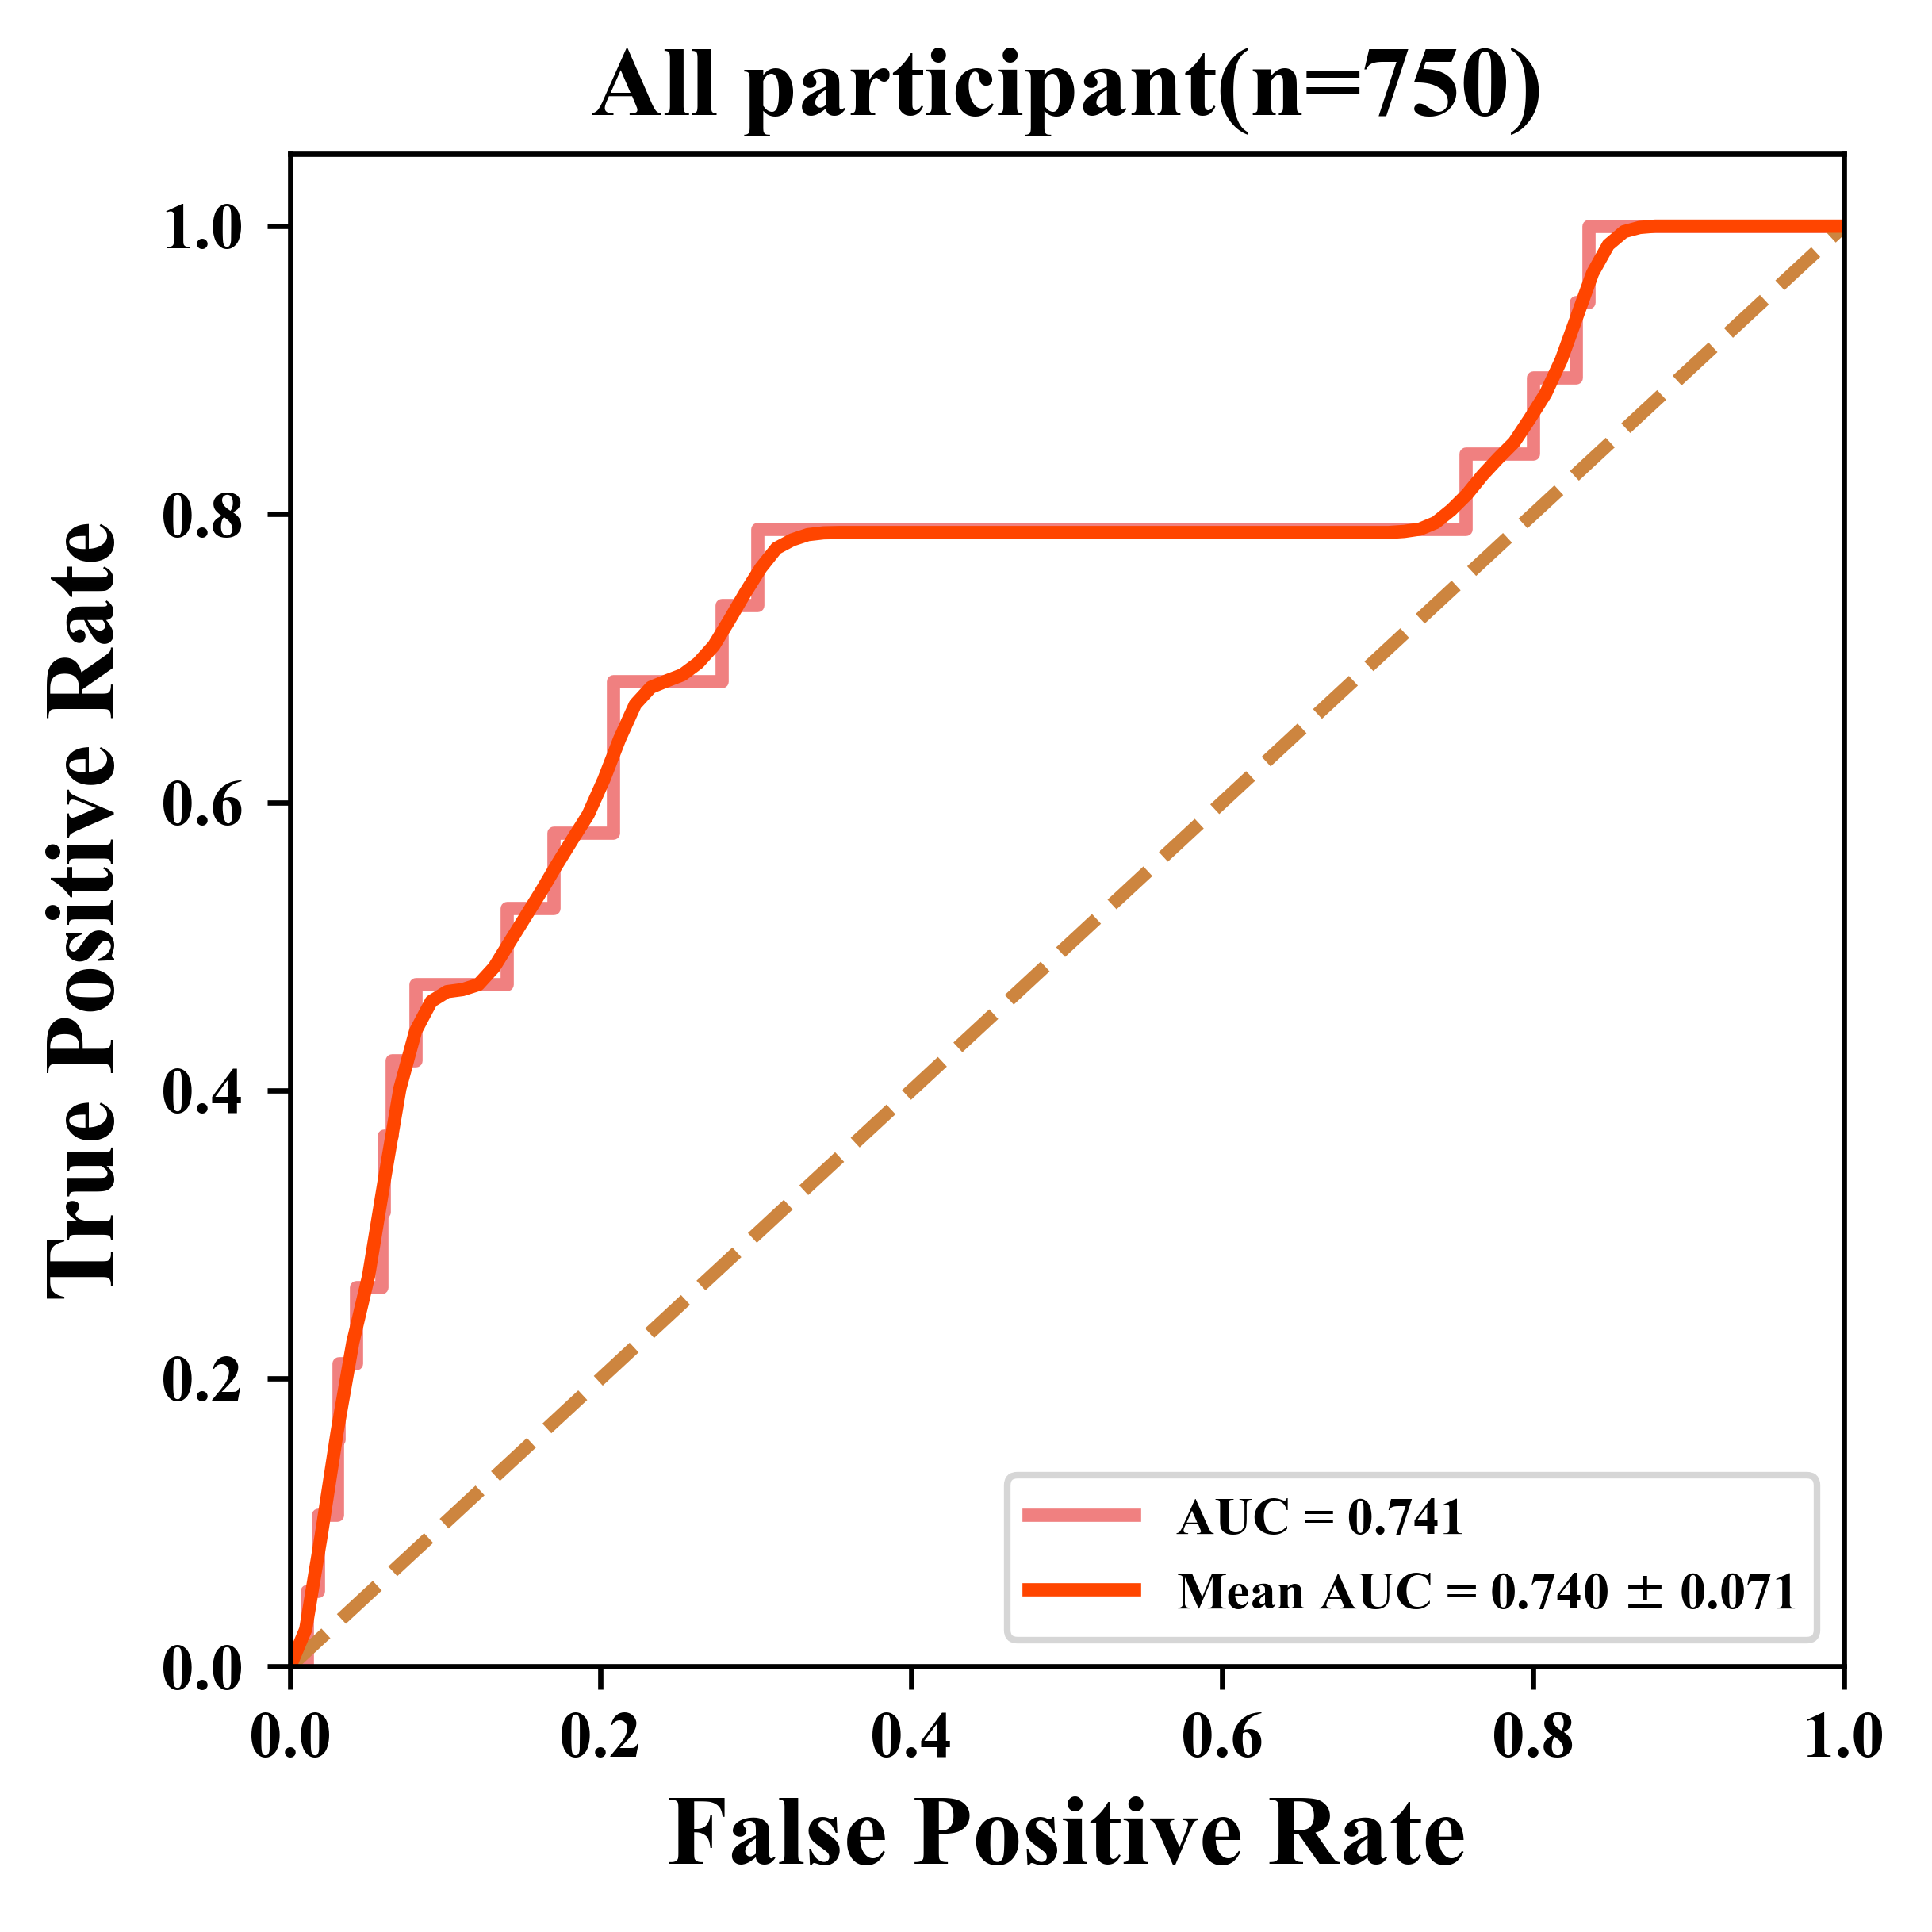

In [23]:
plt.figure(figsize=(4, 4),dpi=600)
fpr, tpr, _ = roc_curve(df['al'], df['proba'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='lightcoral', lw=2, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='peru', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',weight='bold',fontproperties = 'Times New Roman',fontsize = 15)
plt.ylabel('True Positive Rate',weight='bold',fontproperties = 'Times New Roman',fontsize = 15)
plt.xticks(rotation=0,fontsize=9,fontproperties = 'Times New Roman',weight='bold')
plt.yticks(rotation=0,fontsize=9,fontproperties = 'Times New Roman',weight='bold')
plt.title('All participant(n=750)',fontproperties = 'Times New Roman',fontsize = 15,weight='bold')
plt.legend(loc='lower right')
np.random.seed(2025)
n_bootstraps = 1000
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i in range(n_bootstraps):
    indices = resample(np.arange(len(df['al'])))
    fpr_bs, tpr_bs, _ = roc_curve(df['al'].iloc[indices], df['proba'].iloc[indices])
    roc_auc_bs = auc(fpr_bs, tpr_bs)

    interp_tpr = np.interp(mean_fpr, fpr_bs, tpr_bs)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_bs)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

lower_bound = np.percentile(aucs, 2.5)
upper_bound = np.percentile(aucs, 97.5)

plt.plot(mean_fpr, mean_tpr, color='orangered', lw=2, label='Mean AUC = %0.3f $\pm$ %0.3f' % (mean_auc, std_auc))
fontdict_prop = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 8,
}
plt.legend(loc="lower right",prop=fontdict_prop)
plt.tight_layout(pad=0.5)
plt.show() 

Figure 3b

In [26]:
conf_matrix = confusion_matrix(df['al'], df['prediction'])
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
ppv = TP / (TP + FP)
npv = TN / (TN + FN)
accuracy = accuracy_score(df['al'], df['prediction'])
print('灵敏度:', sensitivity)
print('特异度:', specificity)
print('阳性预测值 (PPV):', ppv)
print('阴性预测值 (NPV):', npv)
print('准确度:', accuracy)

灵敏度: 0.5263157894736842
特异度: 0.8344733242134063
阳性预测值 (PPV): 0.07633587786259542
阴性预测值 (NPV): 0.9854604200323102
准确度: 0.8266666666666667


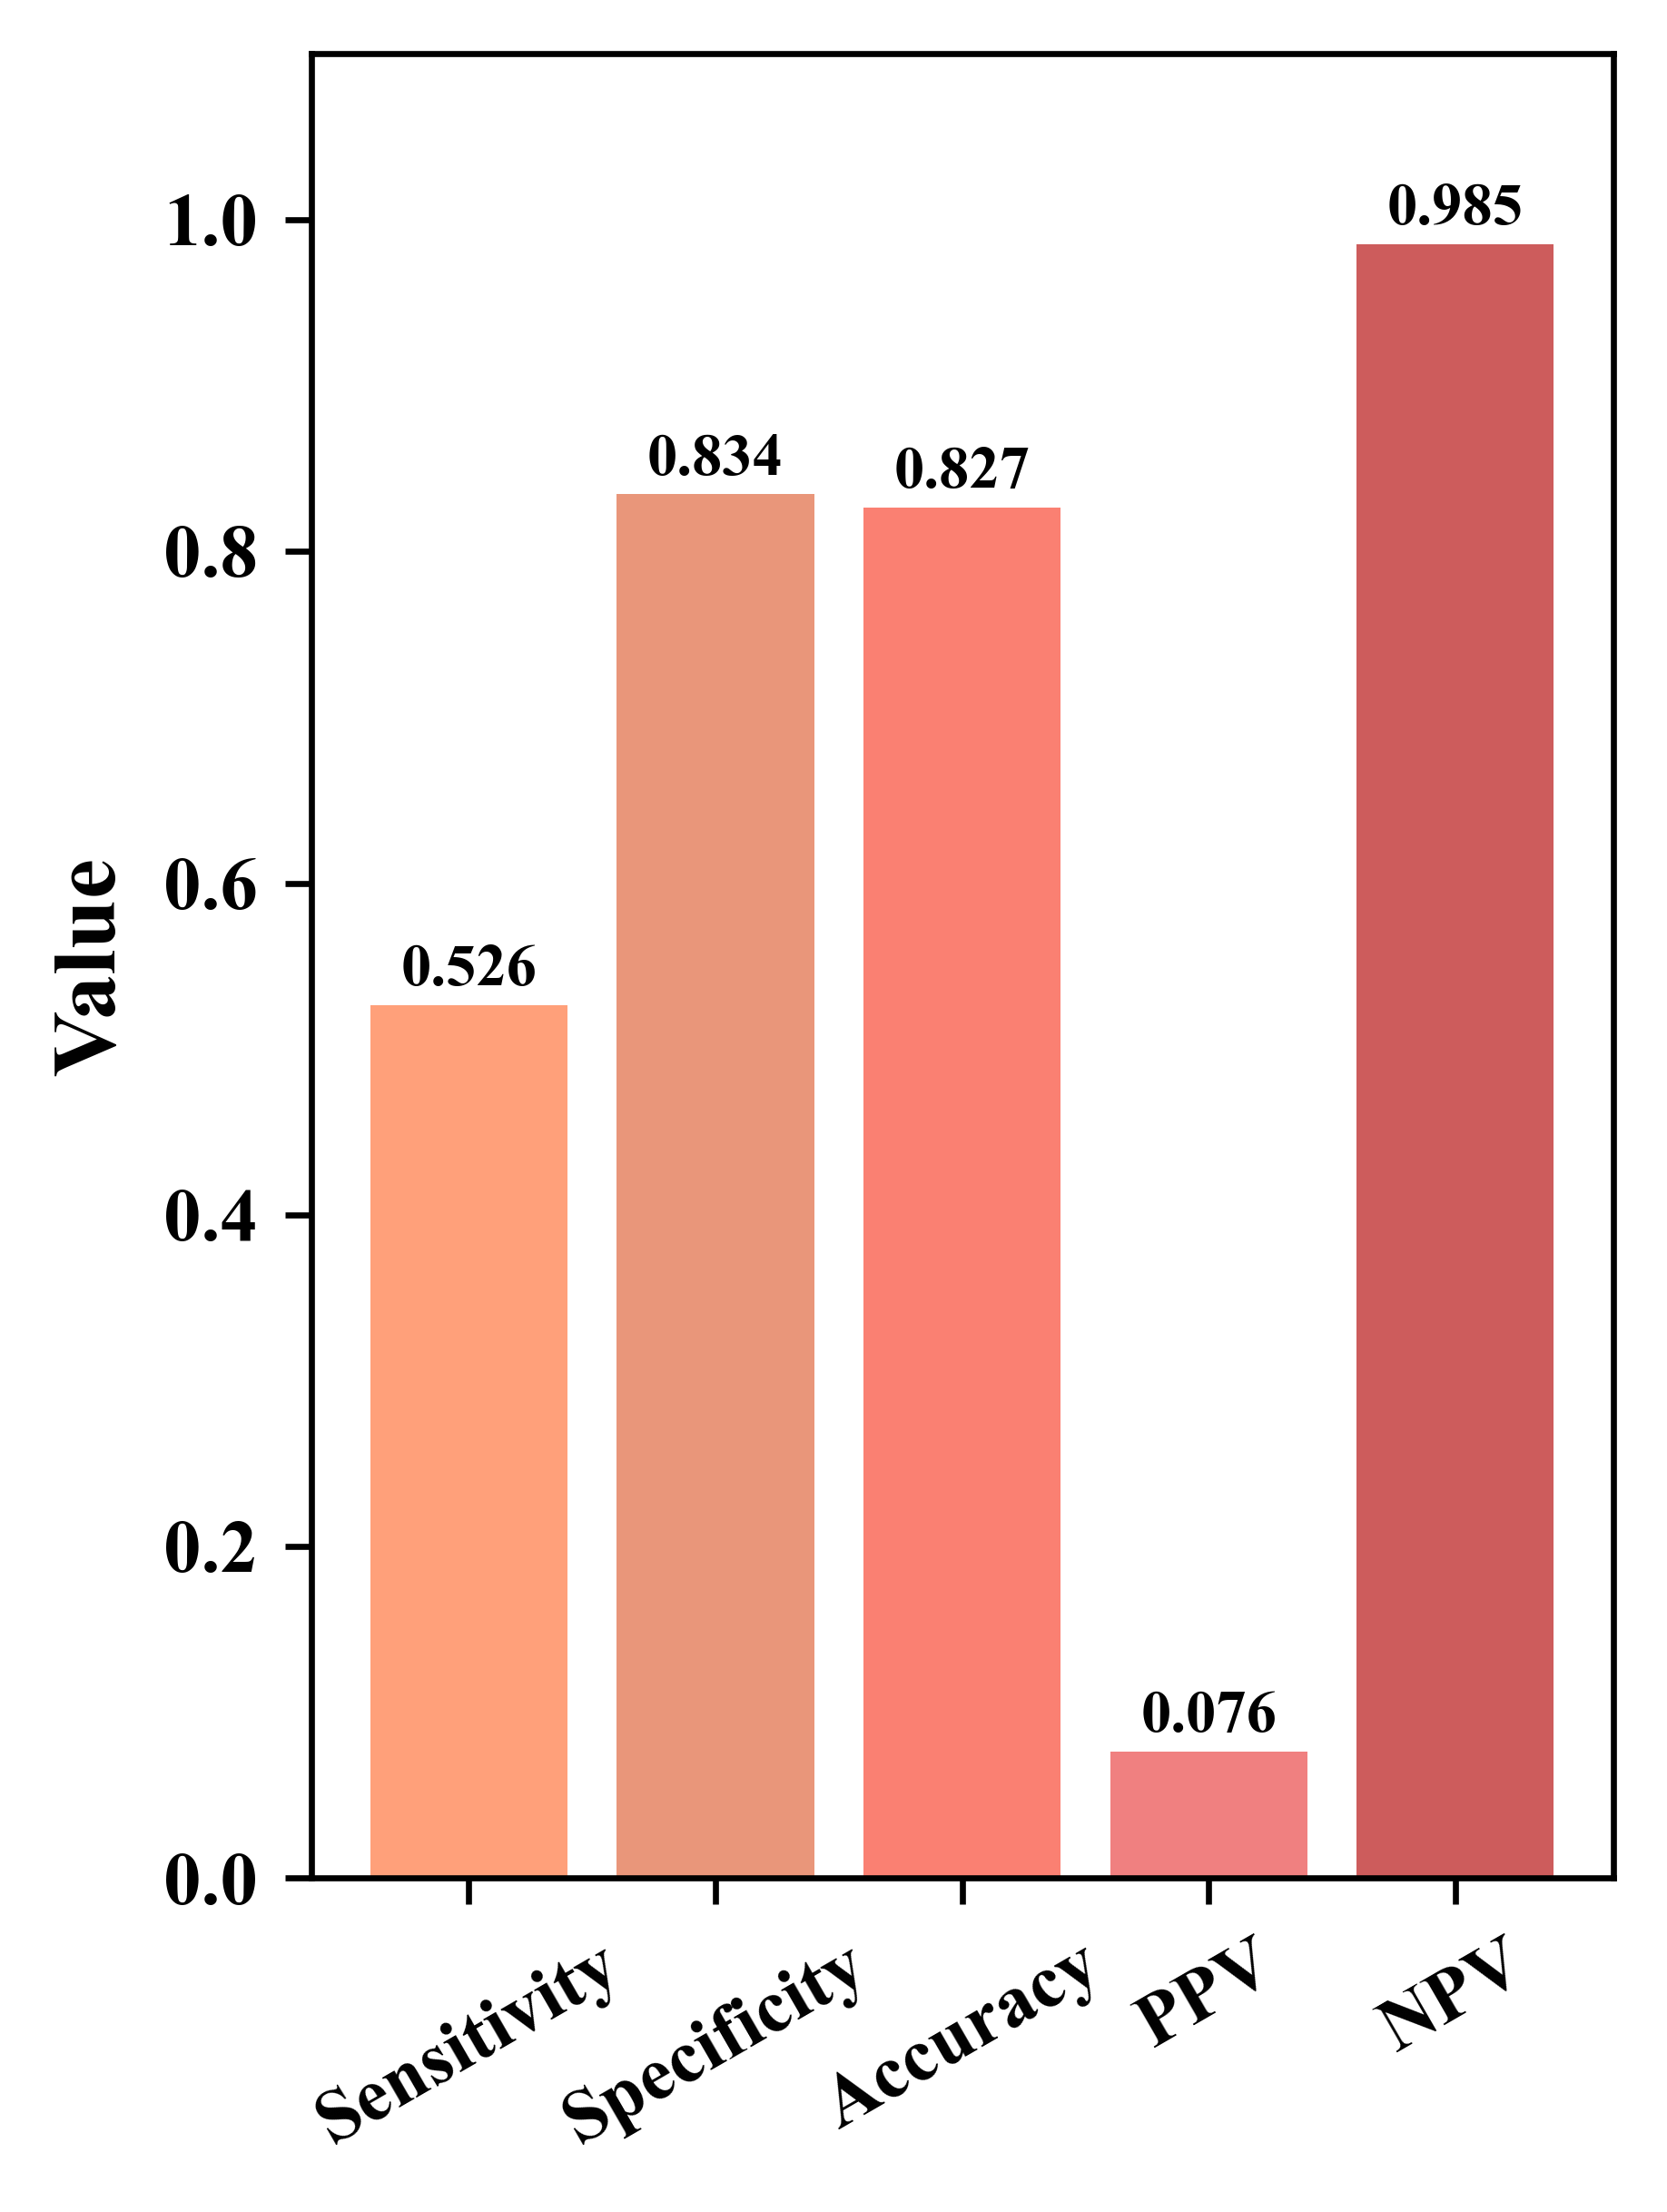

In [28]:
labels = ['Sensitivity', 'Specificity', 'Accuracy','PPV', 'NPV',]
values = [sensitivity, specificity, accuracy,ppv, npv]
colors=['lightsalmon', 'darksalmon', 'salmon', 'lightcoral', 'indianred']
fig, ax = plt.subplots(figsize=(3, 4), dpi=600)
bars = ax.bar(labels, values, color=colors)
ax.set_ylabel('Value',fontproperties = 'Times New Roman',weight='bold',fontsize=12)
plt.xticks(rotation=30,fontproperties = 'Times New Roman',weight='bold',fontsize=10,)
plt.yticks(fontproperties = 'Times New Roman',weight='bold',fontsize=10,)
plt.ylim(0,1.1)
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),  
                textcoords="offset points",
                ha='center', va='bottom',fontproperties = 'Times New Roman',weight='bold',fontsize=8)

plt.tight_layout(pad=0.5)
plt.show()


Figure 3c

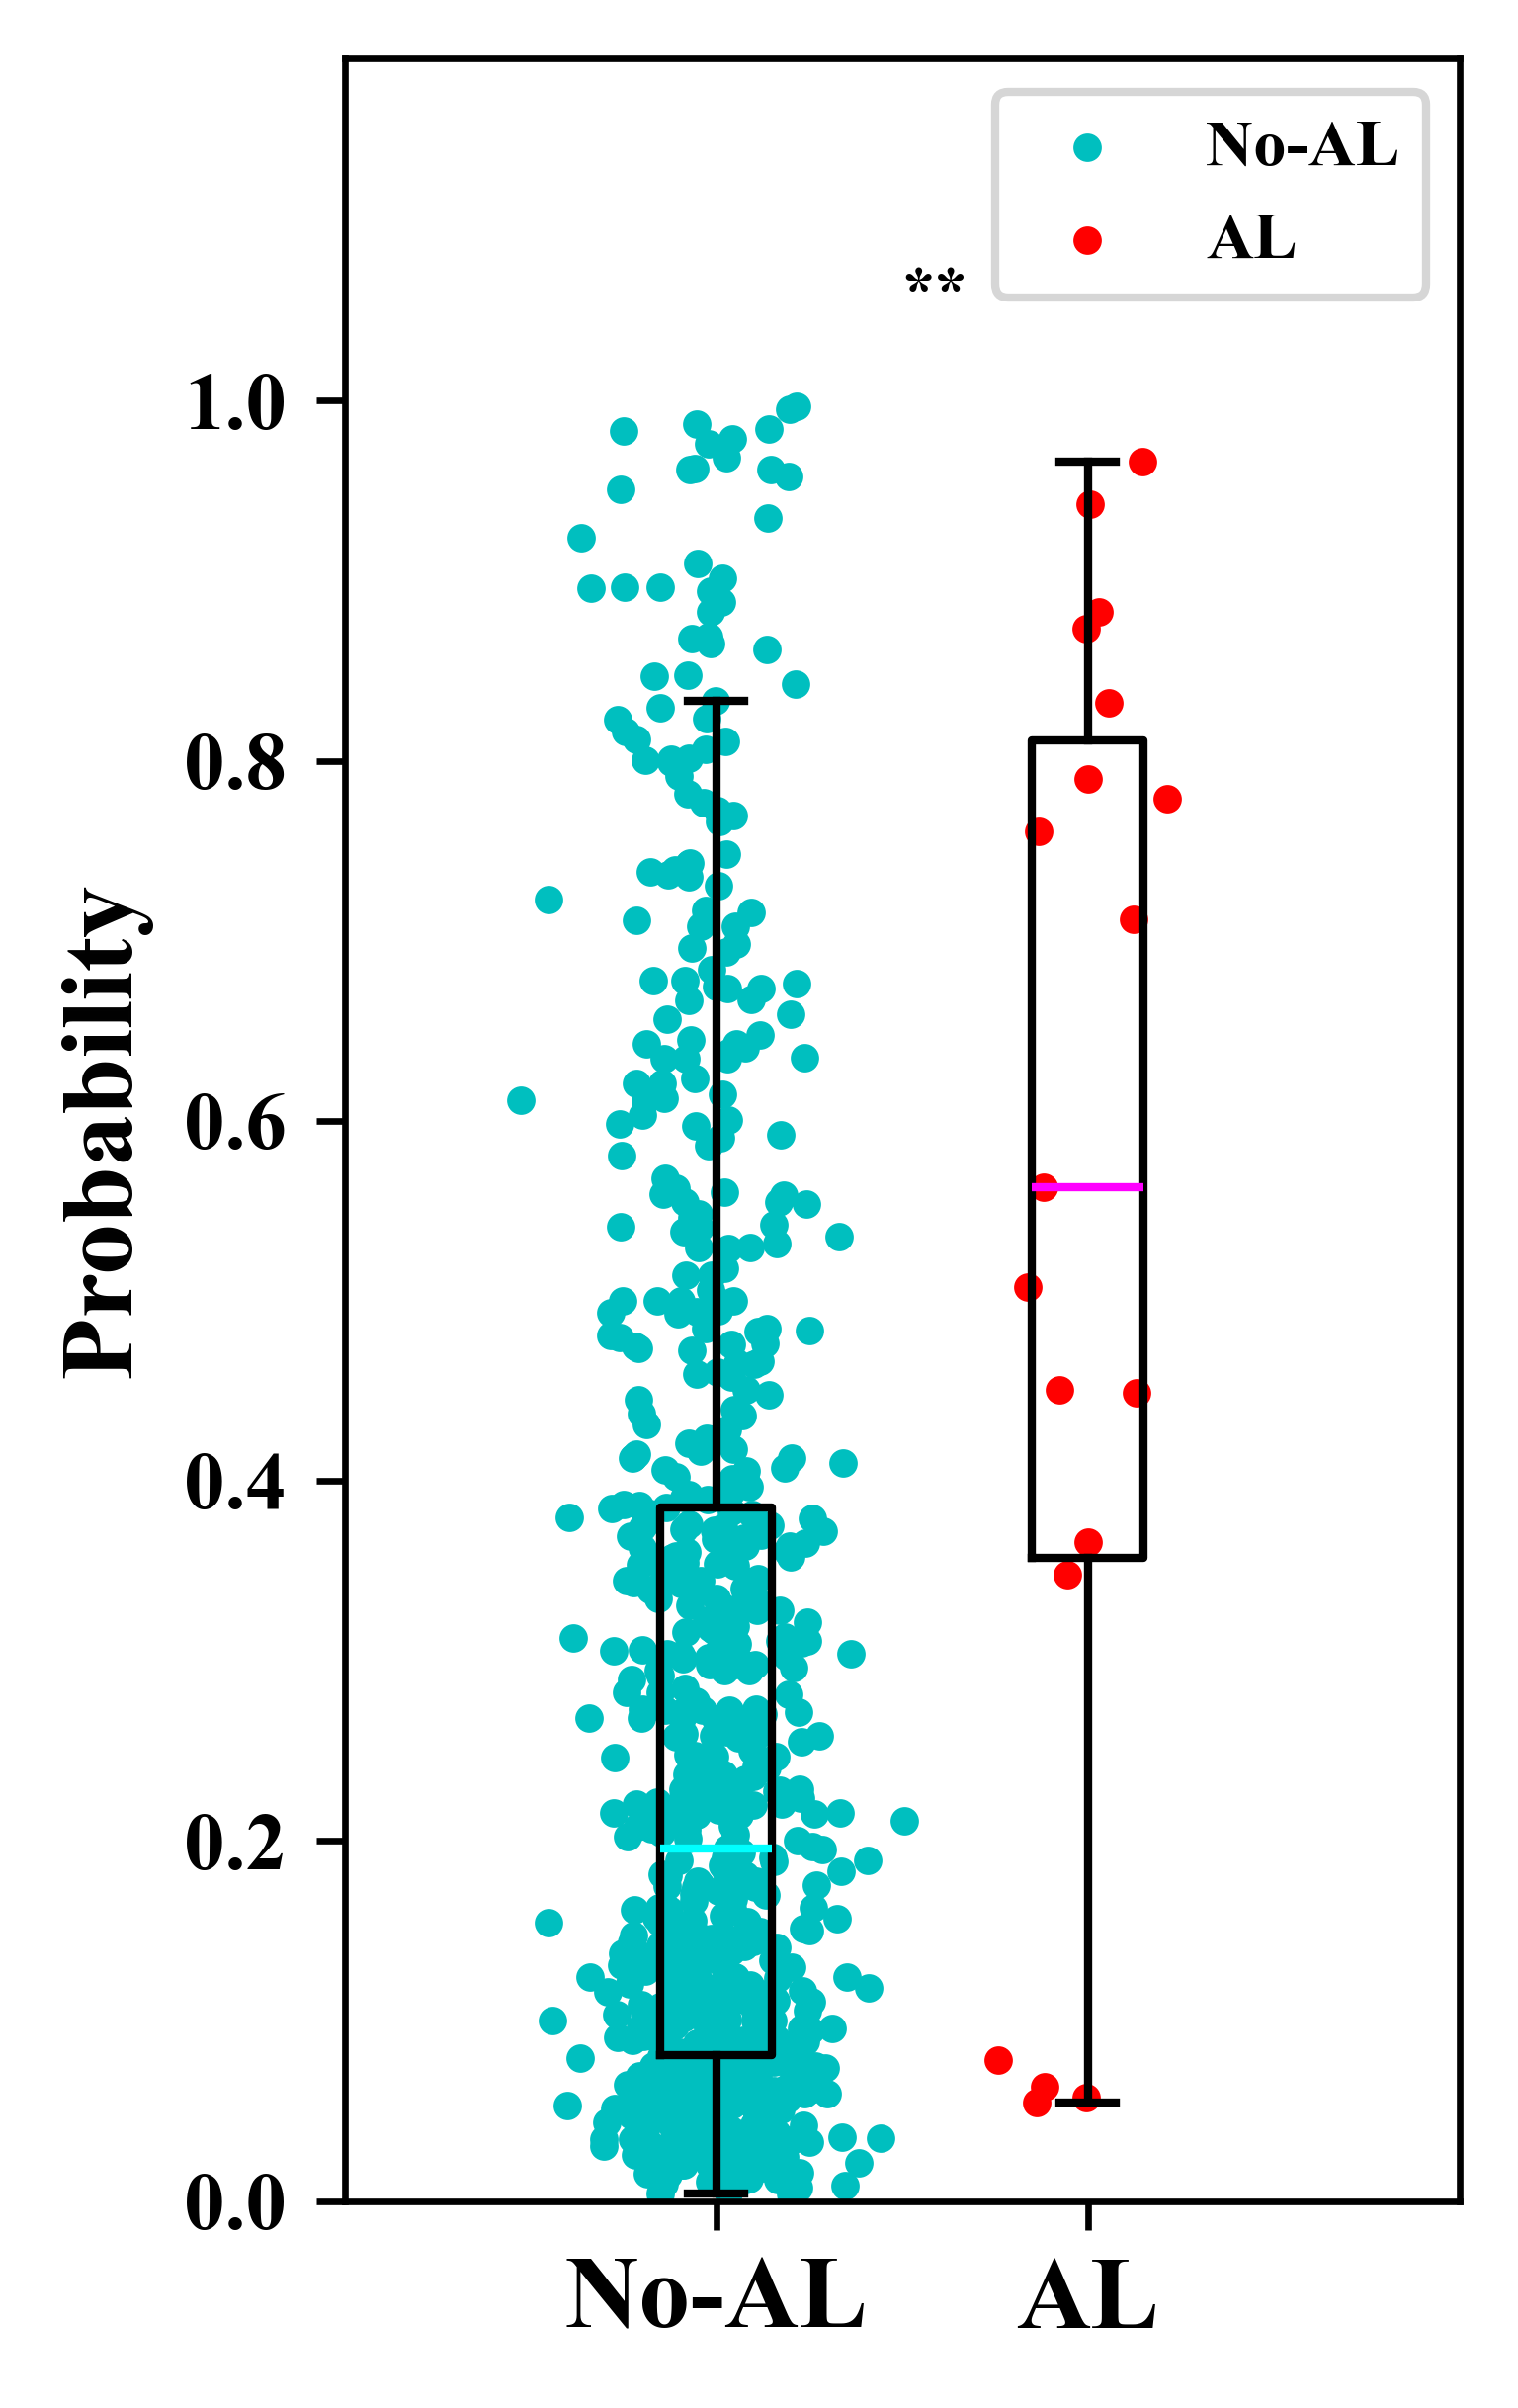

In [31]:
data1 = [df['proba'][df['al'] == 0], df['proba'][df['al'] == 1]]
positions = []
gap_between_pairs = 0.5 
for i in range(2):
    base_pos = i * gap_between_pairs + 1
    positions.append(base_pos)
plt.figure(figsize=(2.5, 4), dpi=600)
bp = plt.boxplot(data1, positions=positions, showfliers=False)
for patch in bp['boxes']:
    patch.set_color('black')
new_positions = positions
custom_labels = ['No-AL', 'AL']
plt.xticks(new_positions, custom_labels)
median_colors = ['cyan', 'magenta']
for i, median in enumerate(bp['medians']):
    median.set_color(median_colors[i % 2])
scatter_colors = ['c', 'red']
for i, d in enumerate(data1):
    x = np.random.normal(positions[i], 0.075, size=len(d))
    label = 'No-AL' if scatter_colors[i] == 'c' else 'AL'
    plt.scatter(x, d, color=scatter_colors[i], alpha=1, s=6, label=label if i < 2 else "")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # 去重
fontdict_prop = {'family': 'Times New Roman',
                 'weight': 'bold',
                 'size': 8,
                 }
plt.legend(by_label.values(), by_label.keys(),loc='upper right', prop=fontdict_prop)

plt.ylabel('Probability', fontproperties='Times New Roman', fontsize=12.5, weight='bold')
plt.xticks(rotation=0,  fontproperties='Times New Roman',fontsize=12.5, weight='bold')
plt.yticks(rotation=0, fontsize=8, fontproperties='Times New Roman', weight='bold')

plt.ylim(0, 1.19)
plt.text(1.25,1.05, '**',rotation=0, fontsize=8, fontproperties='Times New Roman', weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

Figure 3d

In [34]:
excel_file = pd.ExcelFile(r'control.xlsx')
sheet_names = excel_file.sheet_names
sheet_names
df = excel_file.parse('Sheet1')

<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
C:\Users\SSL\AppData\Local\Temp\ipykernel_8604\1516965459.py:42: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(mean_fpr, mean_tpr, color='olive', lw=2, label='Mean AUC = %0.3f $\pm$ %0.3f' % (mean_auc, std_auc))


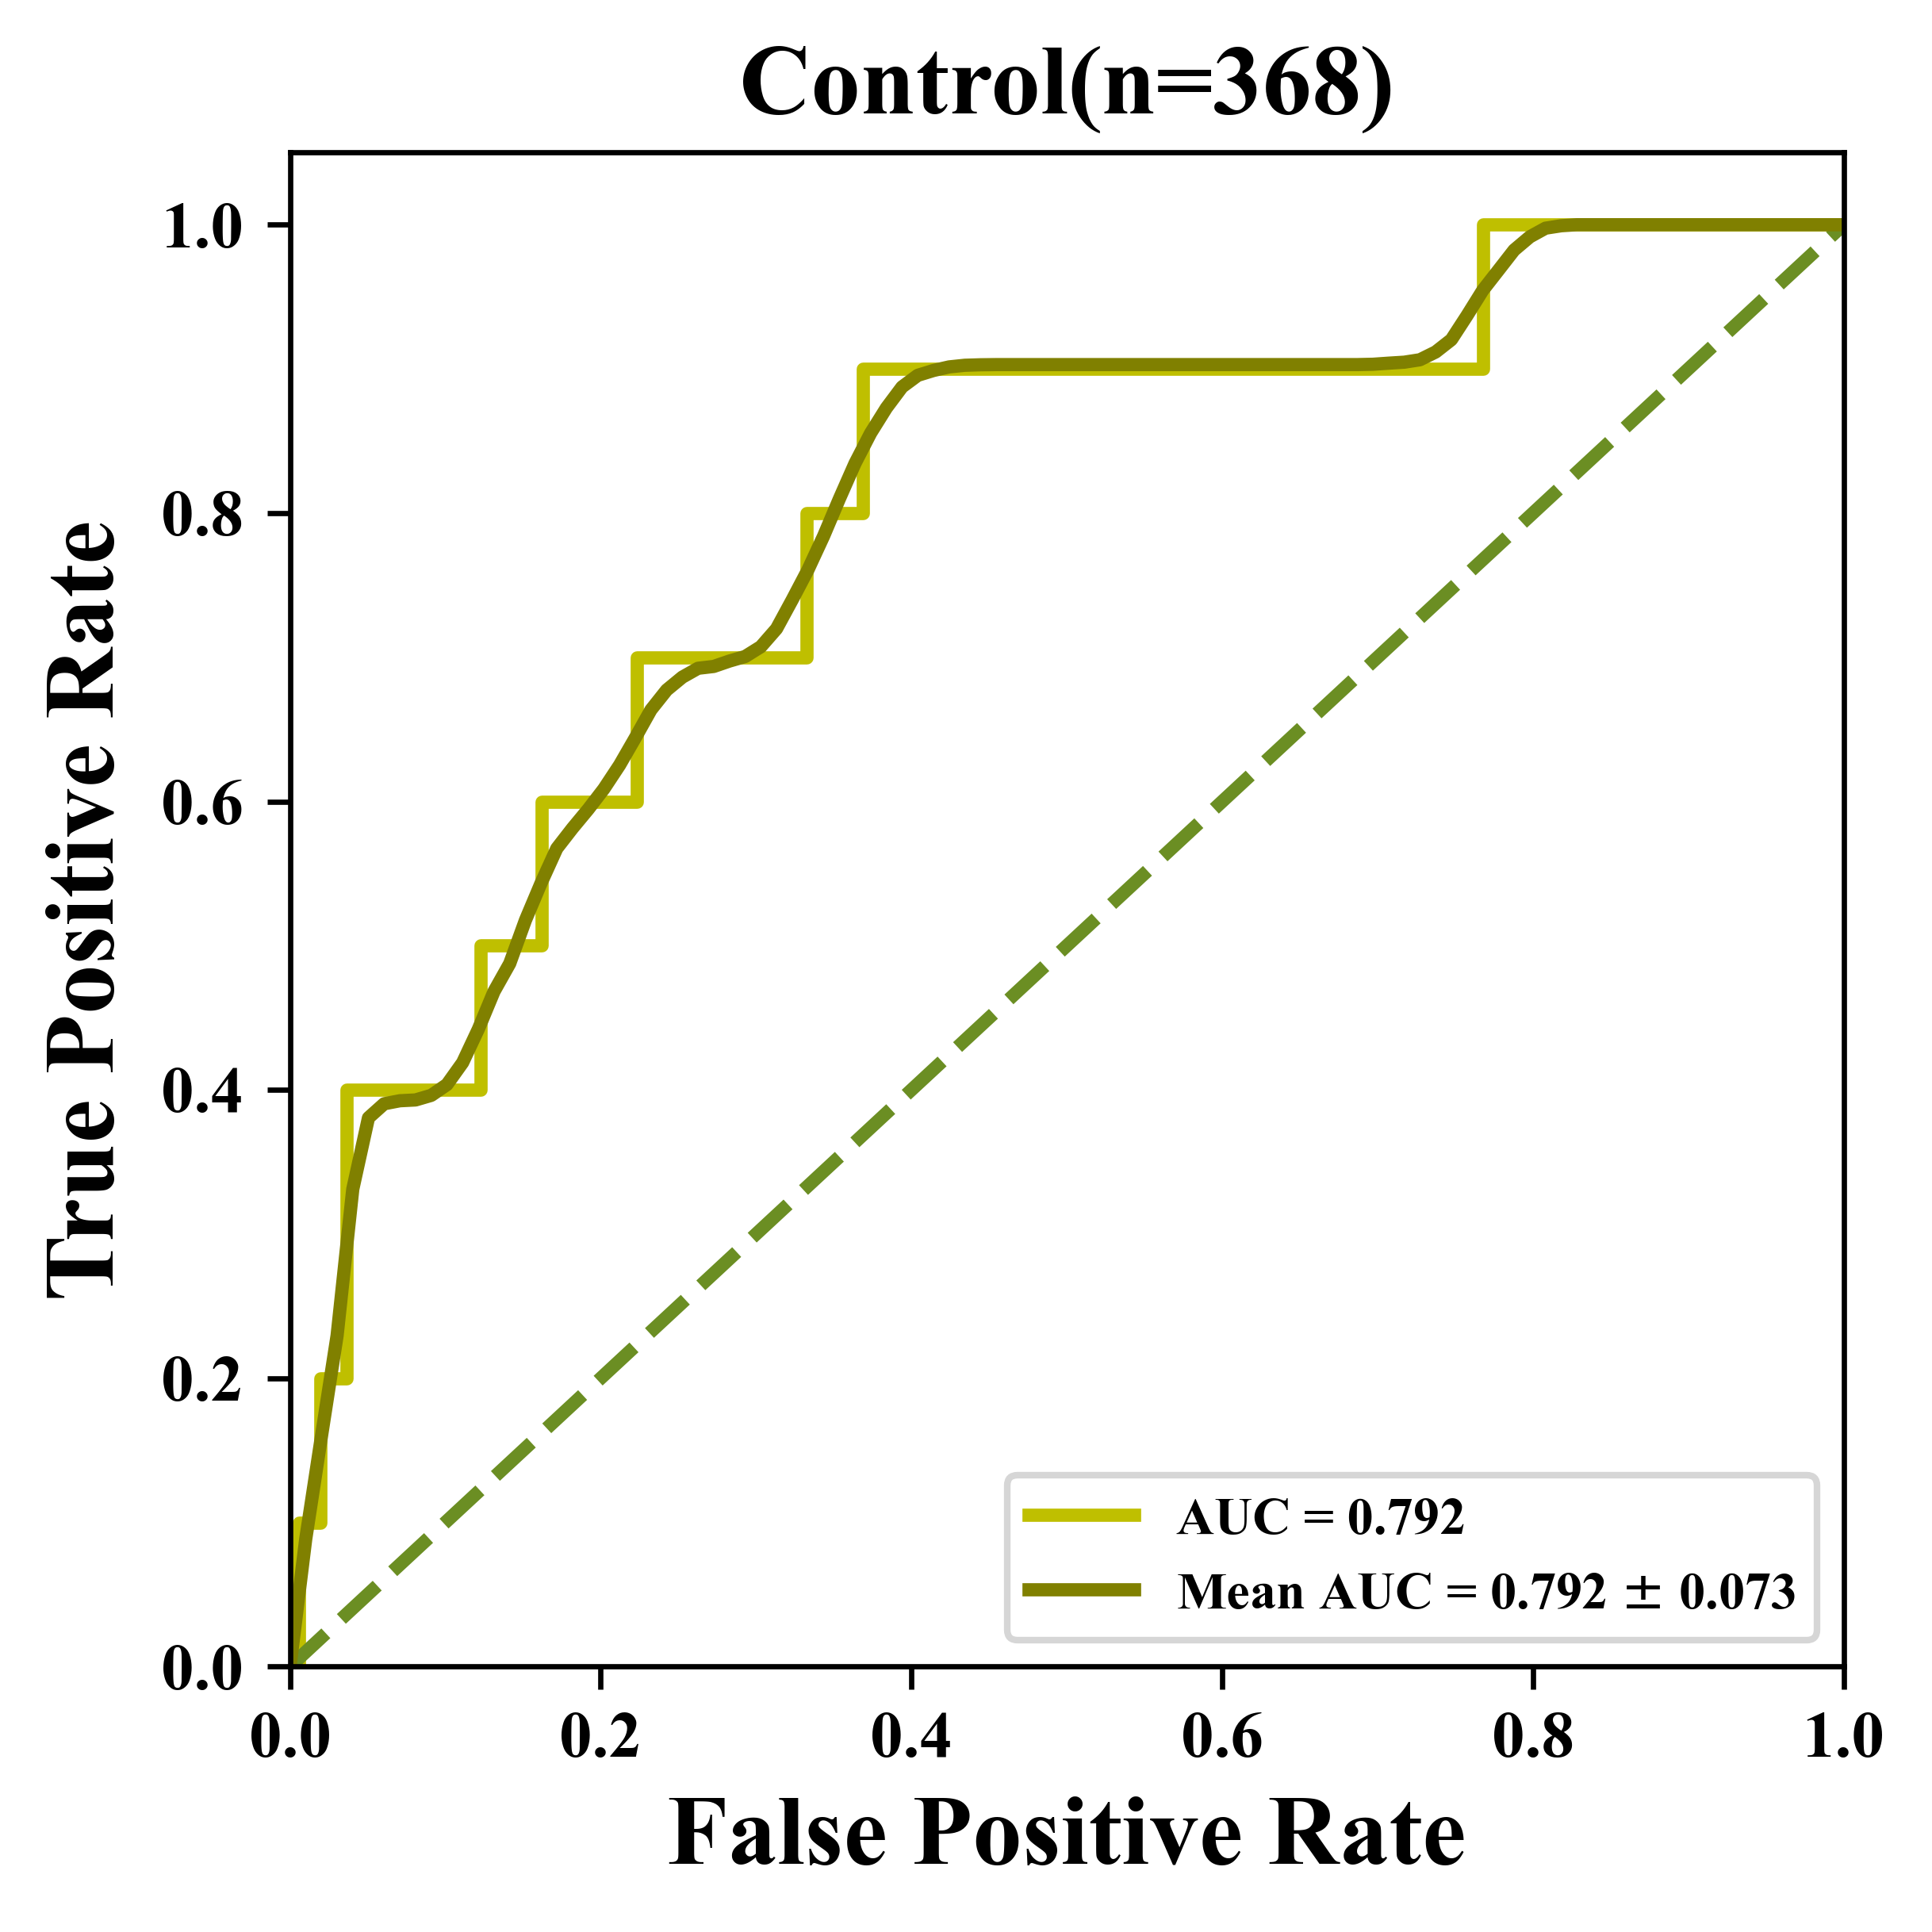

In [36]:
plt.figure(figsize=(4, 4),dpi=600)
fpr, tpr, _ = roc_curve(df['al'], df['proba'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='y', lw=2, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='olivedrab', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',weight='bold',fontproperties = 'Times New Roman',fontsize = 15)
plt.ylabel('True Positive Rate',weight='bold',fontproperties = 'Times New Roman',fontsize = 15)
plt.xticks(rotation=0,fontsize=9,fontproperties = 'Times New Roman',weight='bold')
plt.yticks(rotation=0,fontsize=9,fontproperties = 'Times New Roman',weight='bold')
plt.title('Control(n=368)',fontproperties = 'Times New Roman',fontsize = 15,weight='bold')
plt.legend(loc='lower right')
np.random.seed(2025)
n_bootstraps = 1000
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i in range(n_bootstraps):
    indices = resample(np.arange(len(df['al'])))
    fpr_bs, tpr_bs, _ = roc_curve(df['al'].iloc[indices], df['proba'].iloc[indices])
    roc_auc_bs = auc(fpr_bs, tpr_bs)
    interp_tpr = np.interp(mean_fpr, fpr_bs, tpr_bs)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_bs)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
lower_bound = np.percentile(aucs, 2.5)
upper_bound = np.percentile(aucs, 97.5)
plt.plot(mean_fpr, mean_tpr, color='olive', lw=2, label='Mean AUC = %0.3f $\pm$ %0.3f' % (mean_auc, std_auc))
fontdict_prop = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 8,
}
plt.legend(loc="lower right",prop=fontdict_prop)
plt.tight_layout(pad=0.5)
plt.show() 

In [38]:
conf_matrix = confusion_matrix(df['al'], df['prediction'])
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
ppv = TP / (TP + FP)
npv = TN / (TN + FN)
accuracy = accuracy_score(df['al'], df['prediction'])
print('灵敏度:', sensitivity)
print('特异度:', specificity)
print('阳性预测值 (PPV):', ppv)
print('阴性预测值 (NPV):', npv)
print('准确度:', accuracy)

灵敏度: 0.5
特异度: 0.8463687150837989
阳性预测值 (PPV): 0.08333333333333333
阴性预测值 (NPV): 0.9837662337662337
准确度: 0.8369565217391305


Figure 3e

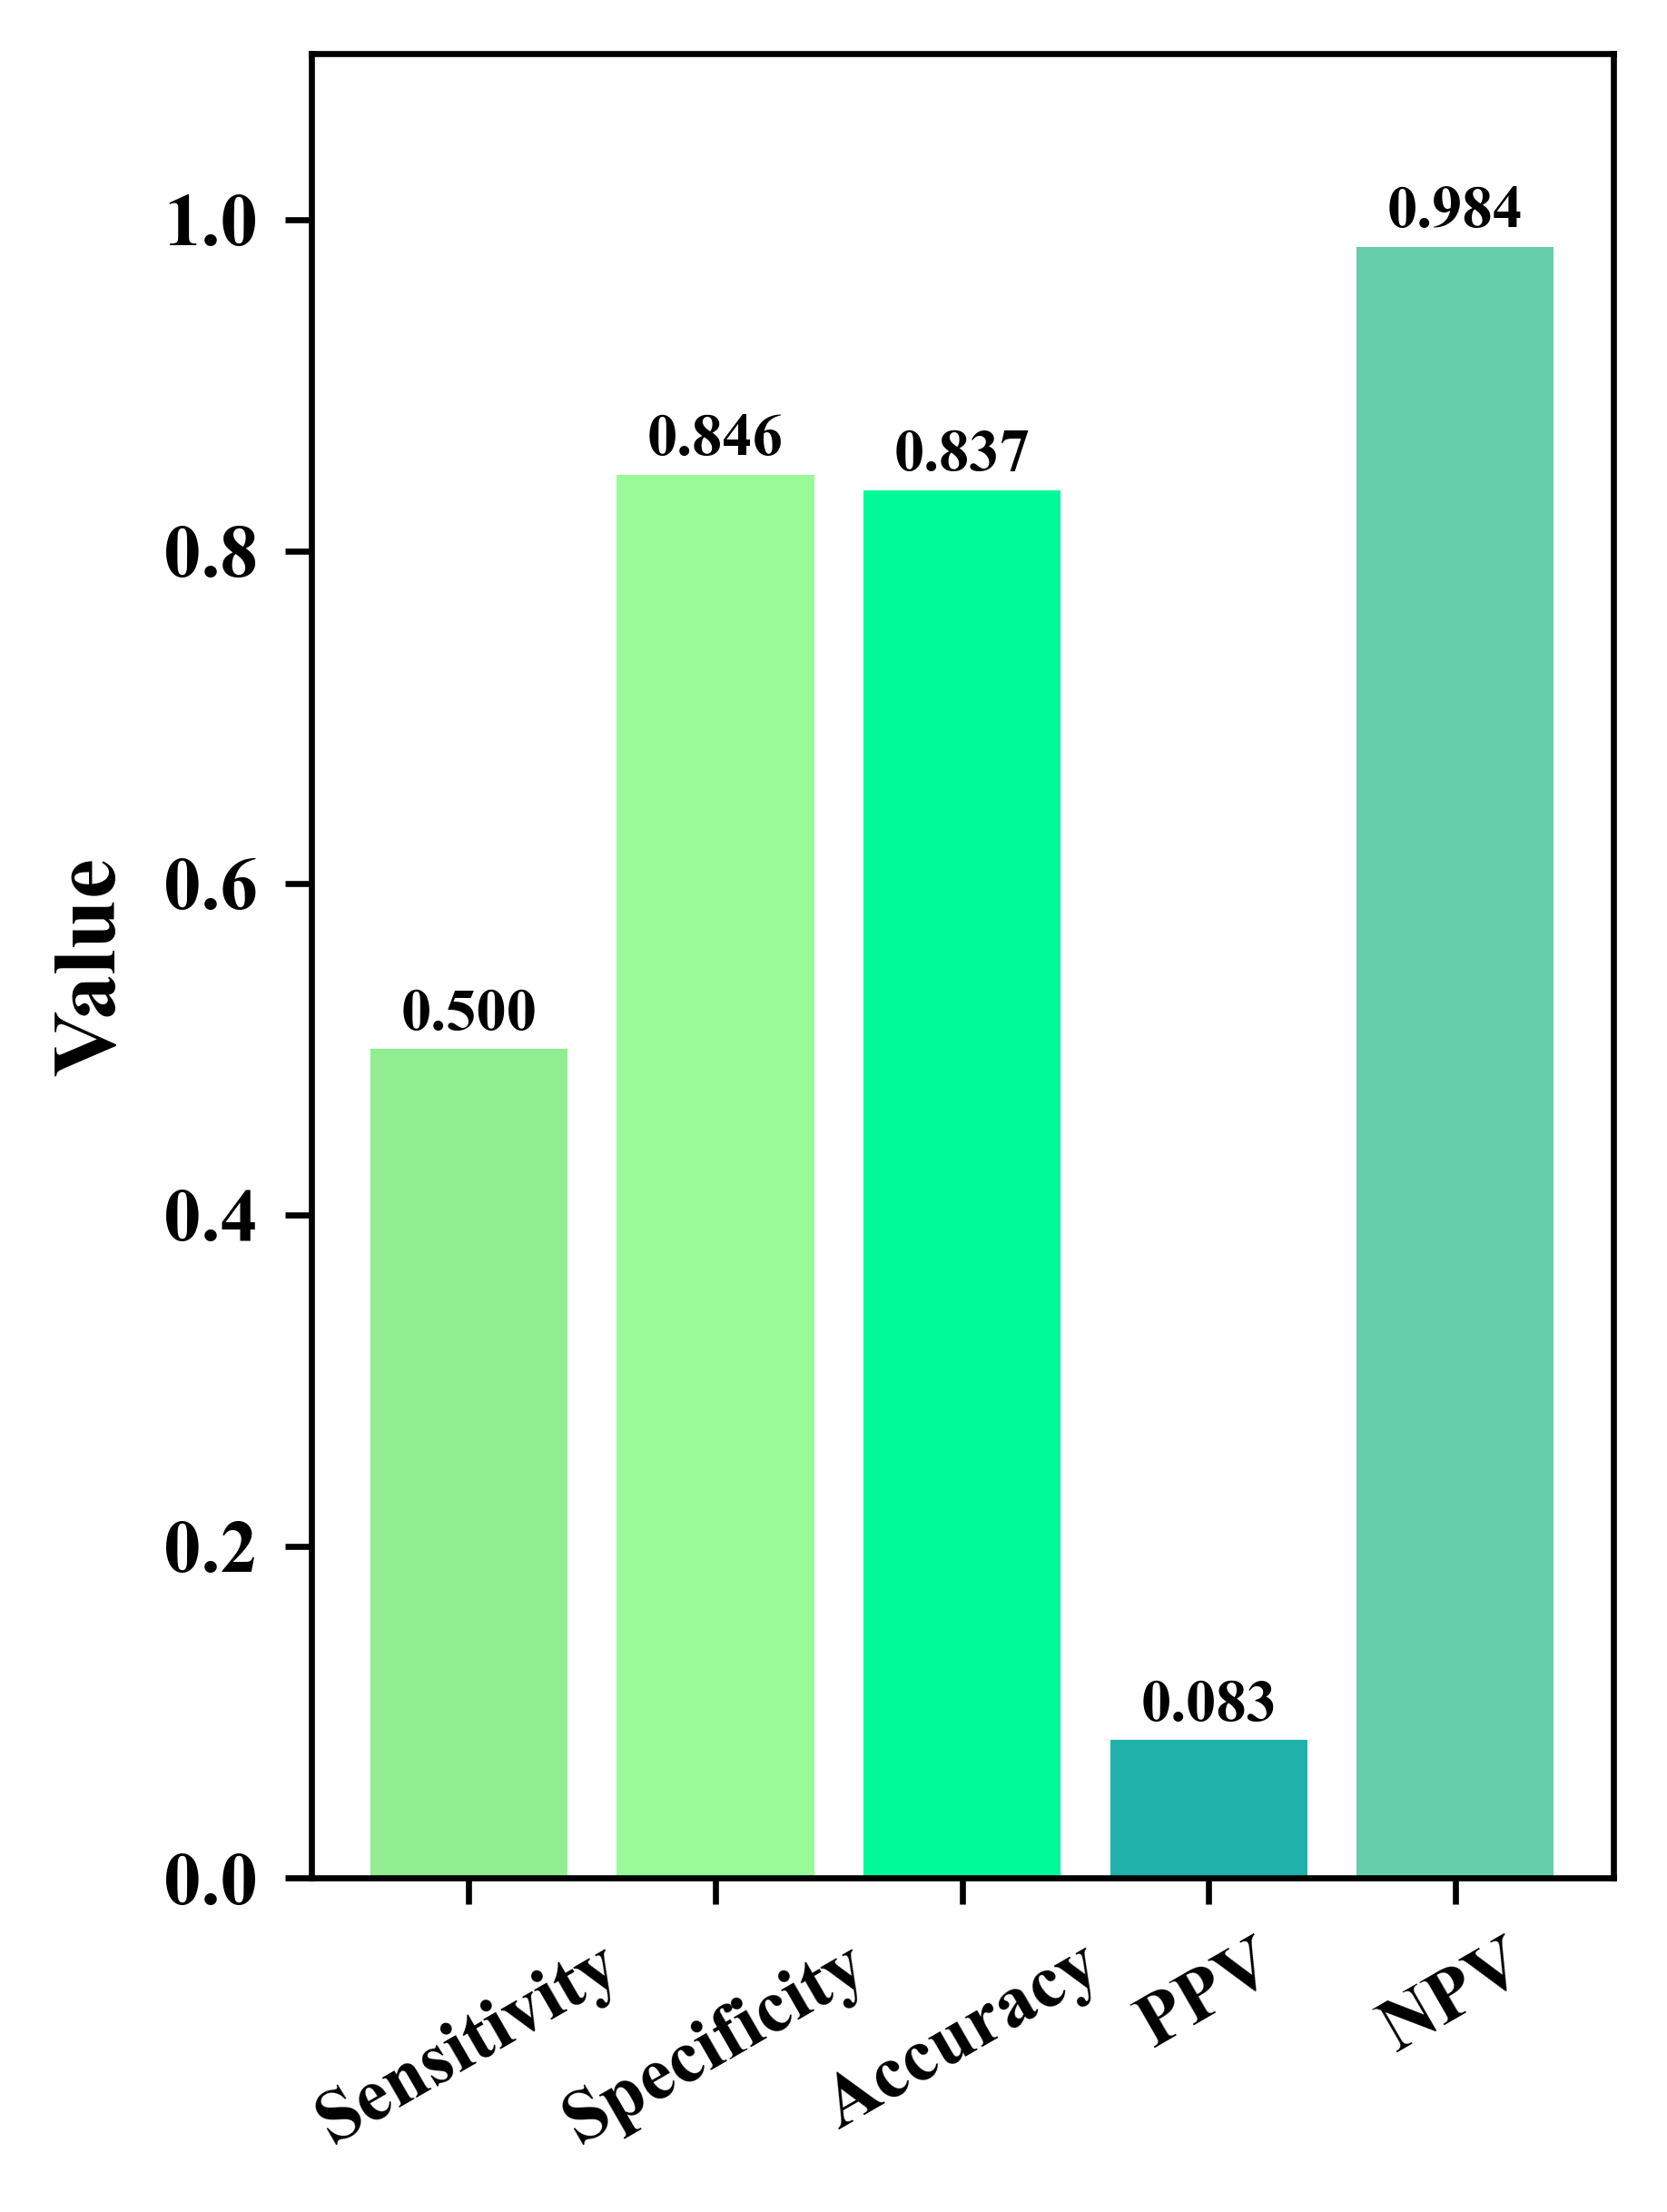

In [41]:
labels = ['Sensitivity', 'Specificity', 'Accuracy','PPV', 'NPV',]
values = [sensitivity, specificity, accuracy,ppv, npv]
colors = ['lightgreen', 'palegreen', 'mediumspringgreen', 'lightseagreen', 'mediumaquamarine']
fig, ax = plt.subplots(figsize=(3, 4), dpi=600)
bars = ax.bar(labels, values, color=colors)
ax.set_ylabel('Value',fontproperties = 'Times New Roman',weight='bold',fontsize=12)
plt.xticks(rotation=30,fontproperties = 'Times New Roman',weight='bold',fontsize=10,)
plt.yticks(fontproperties = 'Times New Roman',weight='bold',fontsize=10,)
plt.ylim(0,1.1)
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',fontproperties = 'Times New Roman',weight='bold',fontsize=8)
plt.tight_layout(pad=0.5)
plt.show()

Figure 3f

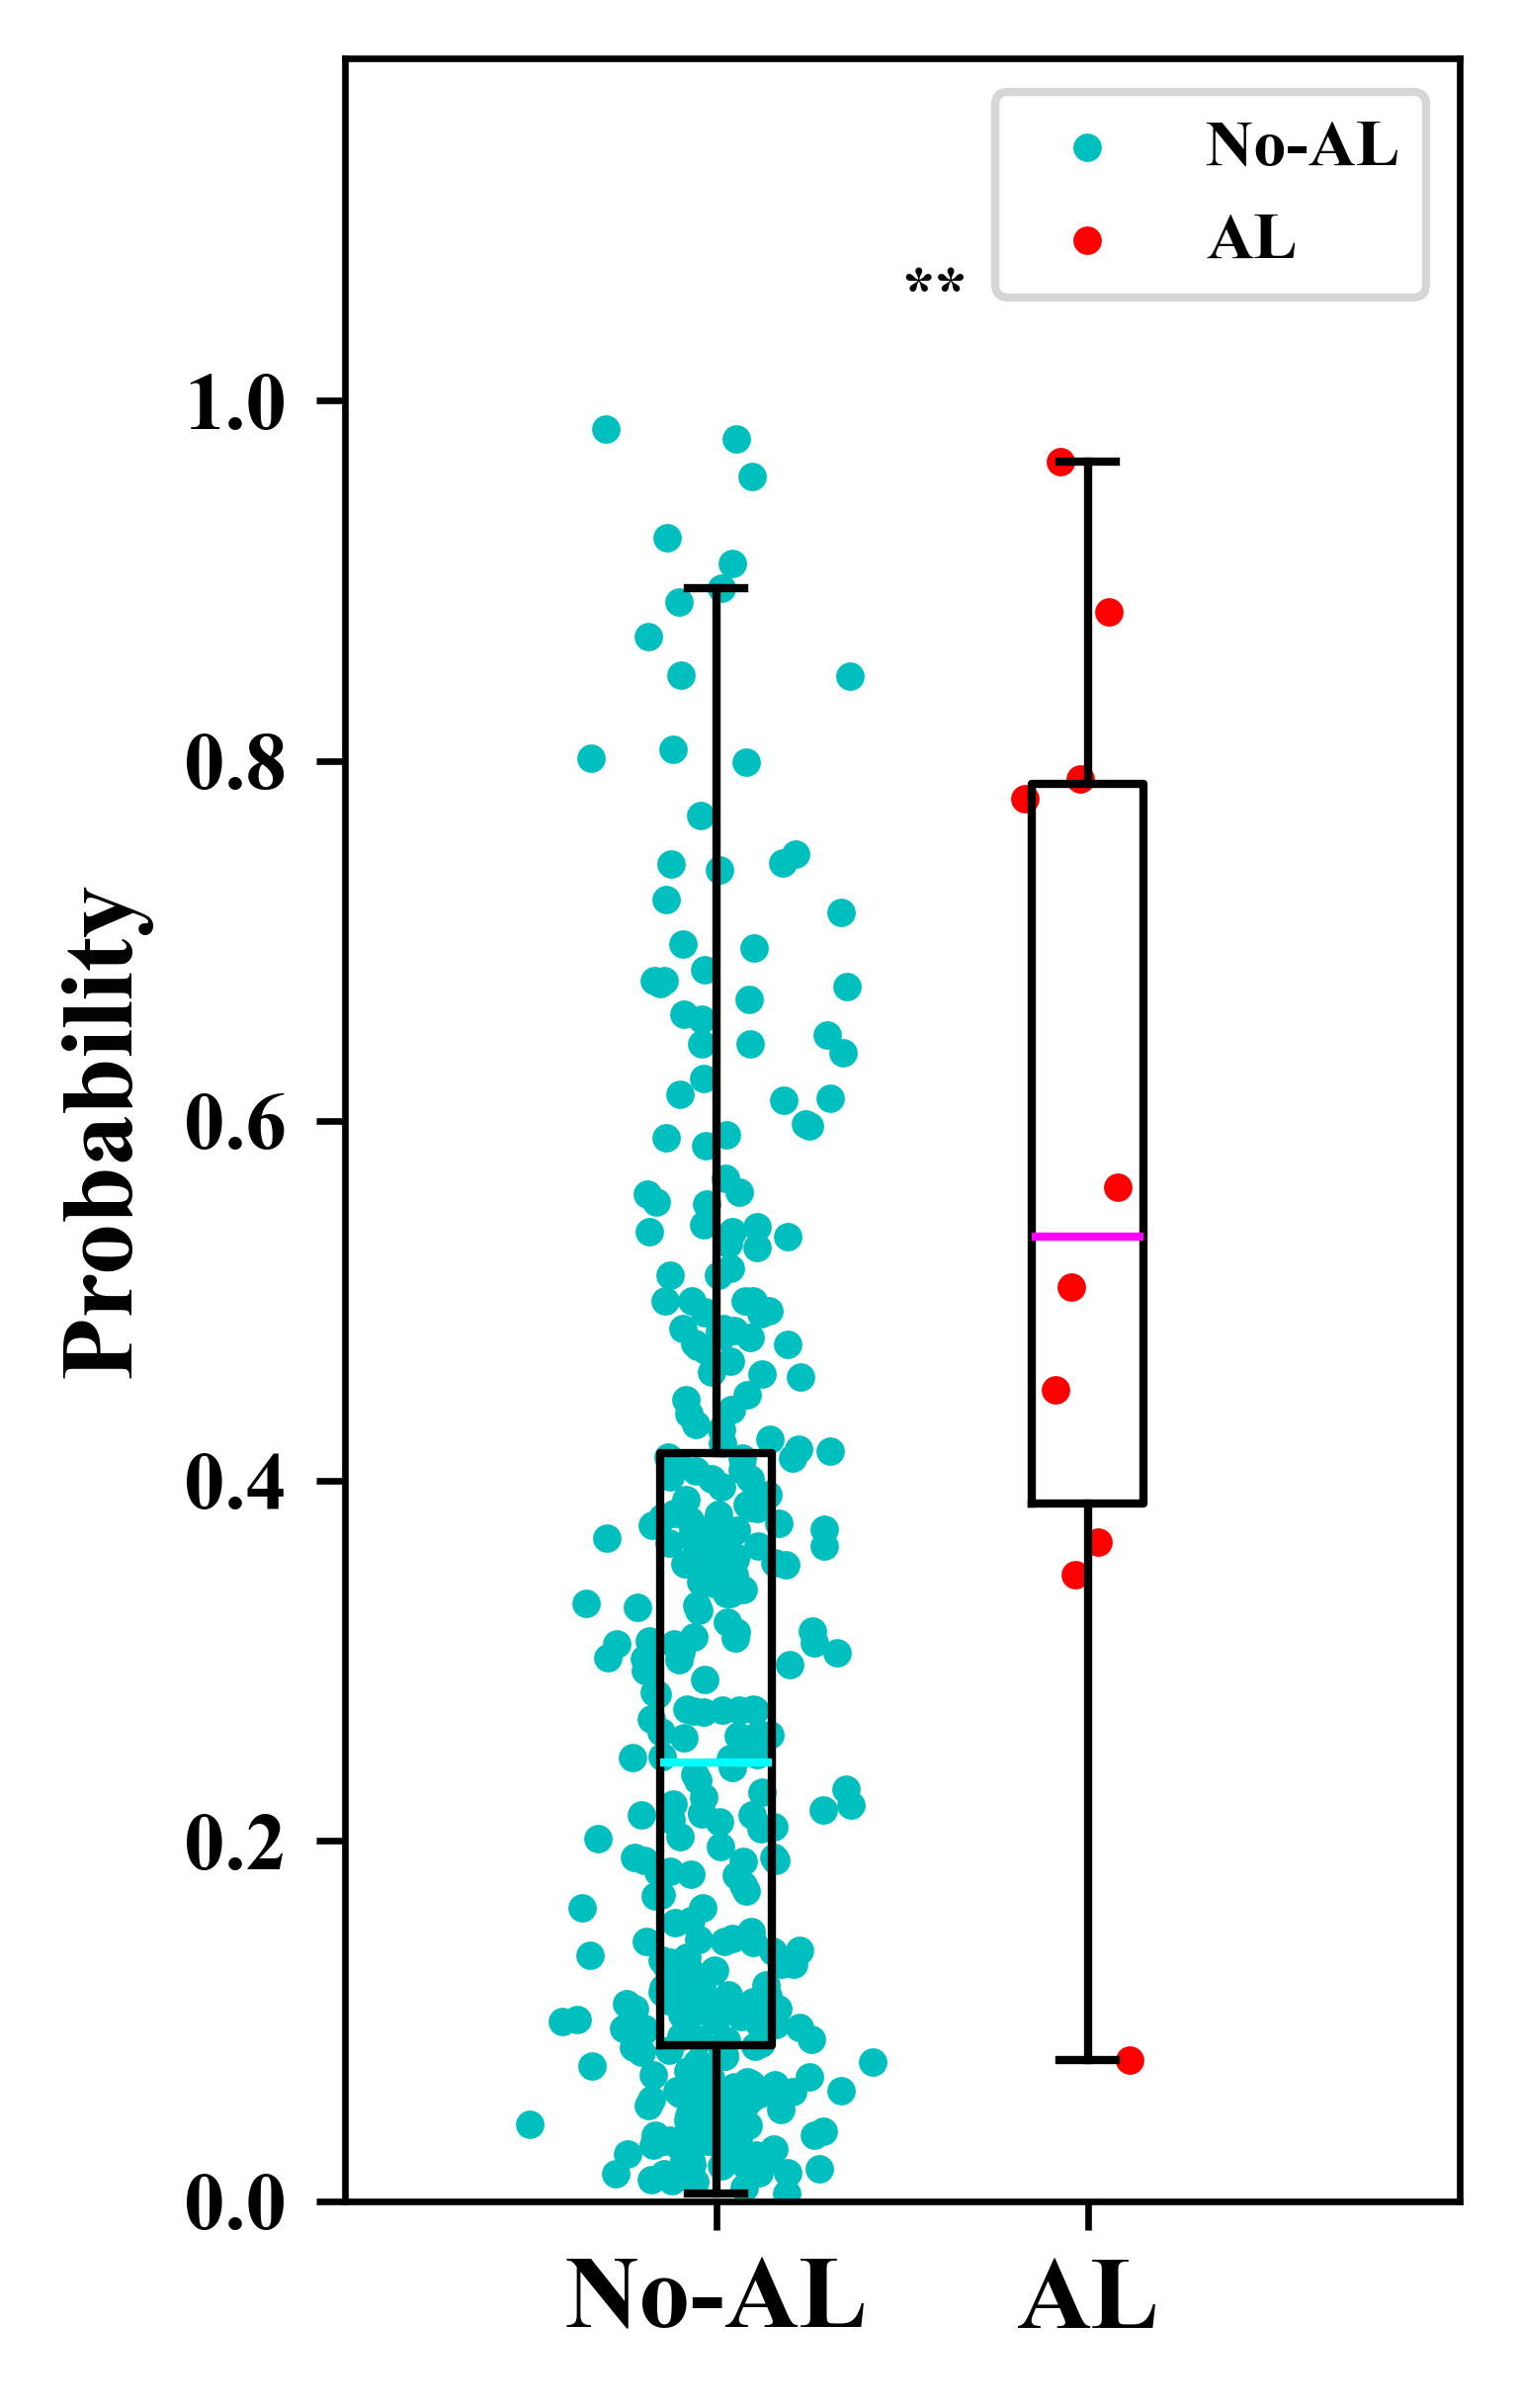

In [44]:
data1 = [df['proba'][df['al'] == 0], df['proba'][df['al'] == 1]]
positions = []
gap_between_pairs = 0.5 
for i in range(2):
    base_pos = i * gap_between_pairs + 1
    positions.append(base_pos)
plt.figure(figsize=(2.5, 4), dpi=600)
bp = plt.boxplot(data1, positions=positions, showfliers=False)
for patch in bp['boxes']:
    patch.set_color('black')
new_positions = positions
custom_labels = ['No-AL', 'AL']
plt.xticks(new_positions, custom_labels)
median_colors = ['cyan', 'magenta']
for i, median in enumerate(bp['medians']):
    median.set_color(median_colors[i % 2])
scatter_colors = ['c', 'red']
for i, d in enumerate(data1):
    x = np.random.normal(positions[i], 0.075, size=len(d))
    label = 'No-AL' if scatter_colors[i] == 'c' else 'AL'
    plt.scatter(x, d, color=scatter_colors[i], alpha=1, s=6, label=label if i < 2 else "")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  
fontdict_prop = {'family': 'Times New Roman',
                 'weight': 'bold',
                 'size': 8,
                 }
plt.legend(by_label.values(), by_label.keys(), prop=fontdict_prop)
plt.ylabel('Probability', fontproperties='Times New Roman', fontsize=12.5, weight='bold')
plt.xticks(rotation=0,  fontproperties='Times New Roman', fontsize=12.5,weight='bold')
plt.yticks(rotation=0, fontsize=8, fontproperties='Times New Roman', weight='bold')
plt.ylim(0, 1.19)
plt.text(1.25,1.05, '**',rotation=0, fontsize=8, fontproperties='Times New Roman', weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

Figure 3g

In [3]:
excel_file = pd.ExcelFile(r'rtid.xlsx')
sheet_names = excel_file.sheet_names
sheet_names
df = excel_file.parse('Sheet1')

<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:45: SyntaxWarning: invalid escape sequence '\p'
C:\Users\SSL\AppData\Local\Temp\ipykernel_8604\2244893749.py:45: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(mean_fpr, mean_tpr, color='teal', lw=2, label='Mean AUC = %0.3f $\pm$ %0.3f' % (mean_auc, std_auc))


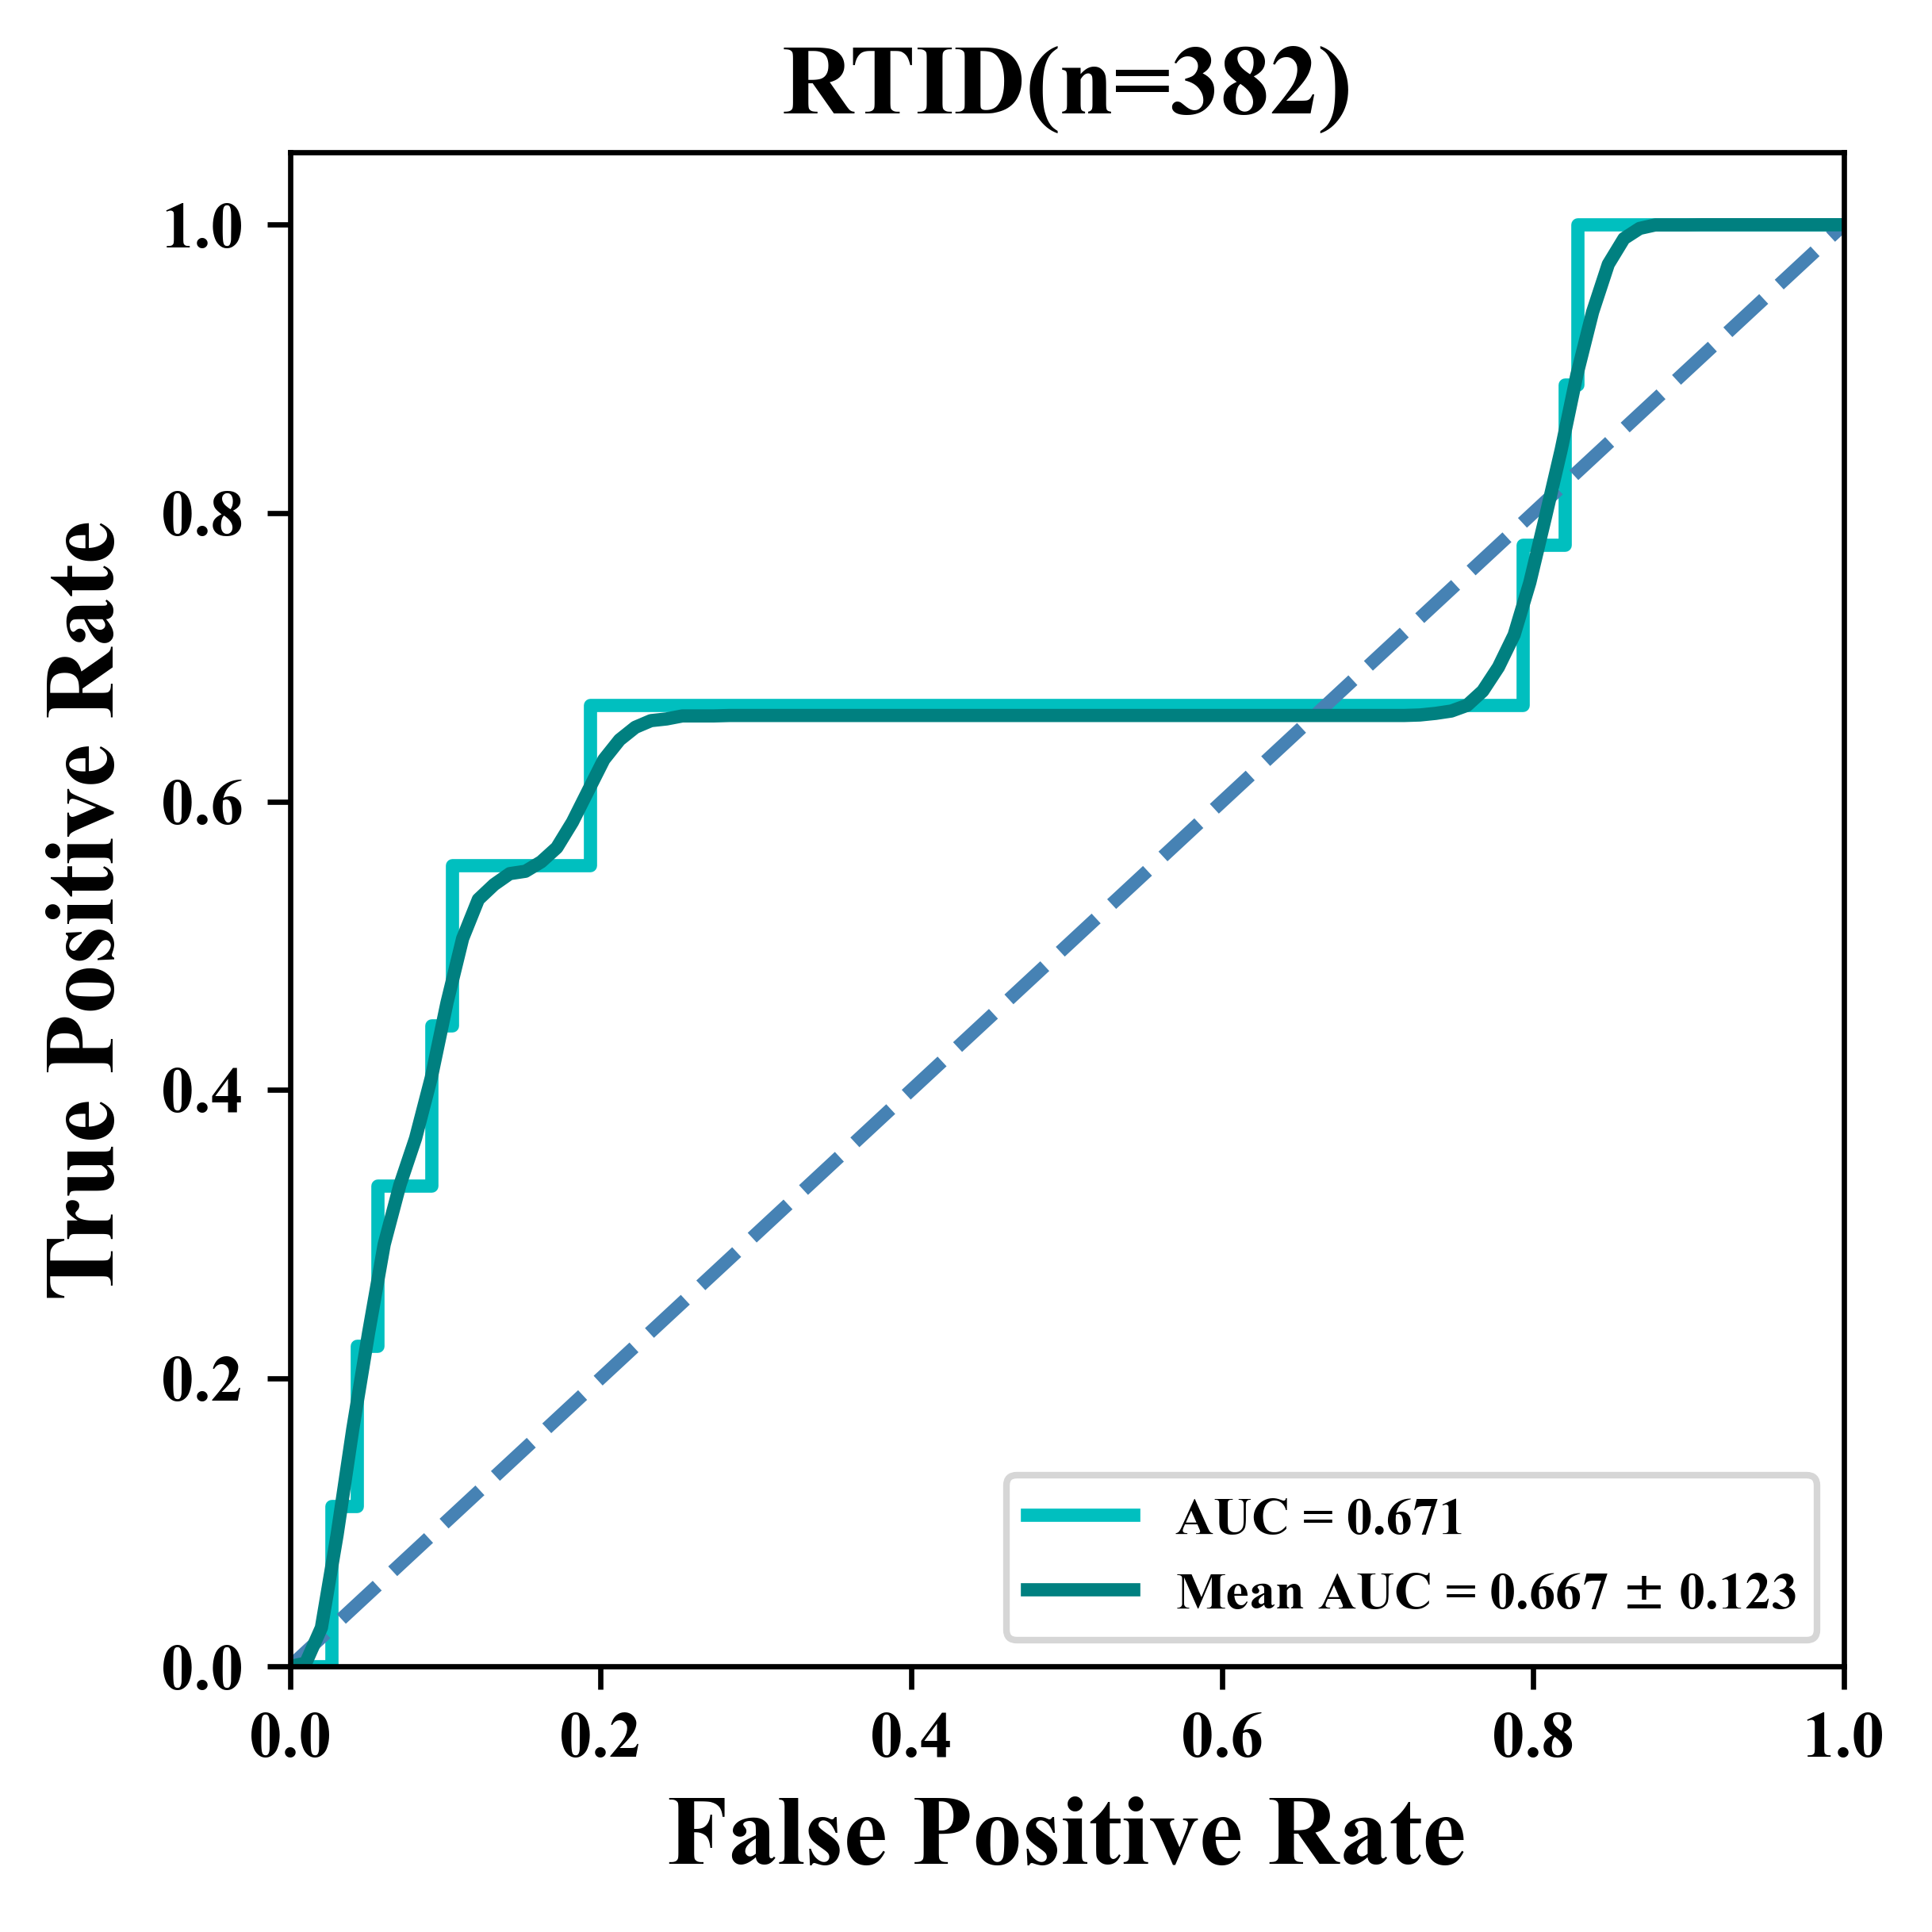

In [5]:
plt.figure(figsize=(4, 4),dpi=600)
fpr, tpr, _ = roc_curve(df['al'], df['proba'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='c', lw=2, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='steelblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',weight='bold',fontproperties = 'Times New Roman',fontsize = 15)
plt.ylabel('True Positive Rate',weight='bold',fontproperties = 'Times New Roman',fontsize = 15)
plt.xticks(rotation=0,fontsize=9,fontproperties = 'Times New Roman',weight='bold')
plt.yticks(rotation=0,fontsize=9,fontproperties = 'Times New Roman',weight='bold')
plt.title('RTID(n=382)',fontproperties = 'Times New Roman',fontsize = 15,weight='bold')
plt.legend(loc='lower right')
#  bootstrap 
np.random.seed(2025)
n_bootstraps = 1000
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i in range(n_bootstraps):
    indices = resample(np.arange(len(df['al'])))
    fpr_bs, tpr_bs, _ = roc_curve(df['al'].iloc[indices], df['proba'].iloc[indices])
    roc_auc_bs = auc(fpr_bs, tpr_bs)
    interp_tpr = np.interp(mean_fpr, fpr_bs, tpr_bs)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_bs)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
lower_bound = np.percentile(aucs, 2.5)
upper_bound = np.percentile(aucs, 97.5)
plt.plot(mean_fpr, mean_tpr, color='teal', lw=2, label='Mean AUC = %0.3f $\pm$ %0.3f' % (mean_auc, std_auc))
fontdict_prop = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 8,
}
plt.legend(loc="lower right",prop=fontdict_prop)
plt.tight_layout(pad=0.5)
plt.show() 

Figure 3h

In [11]:
conf_matrix = confusion_matrix(df['al'], df['prediction'])
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
ppv = TP / (TP + FP)
npv = TN / (TN + FN)
accuracy = accuracy_score(df['al'], df['prediction'])
print('灵敏度:', sensitivity)
print('特异度:', specificity)
print('阳性预测值 (PPV):', ppv)
print('阴性预测值 (NPV):', npv)
print('准确度:', accuracy)

灵敏度: 0.5555555555555556
特异度: 0.8230563002680965
阳性预测值 (PPV): 0.07042253521126761
阴性预测值 (NPV): 0.9871382636655949
准确度: 0.8167539267015707


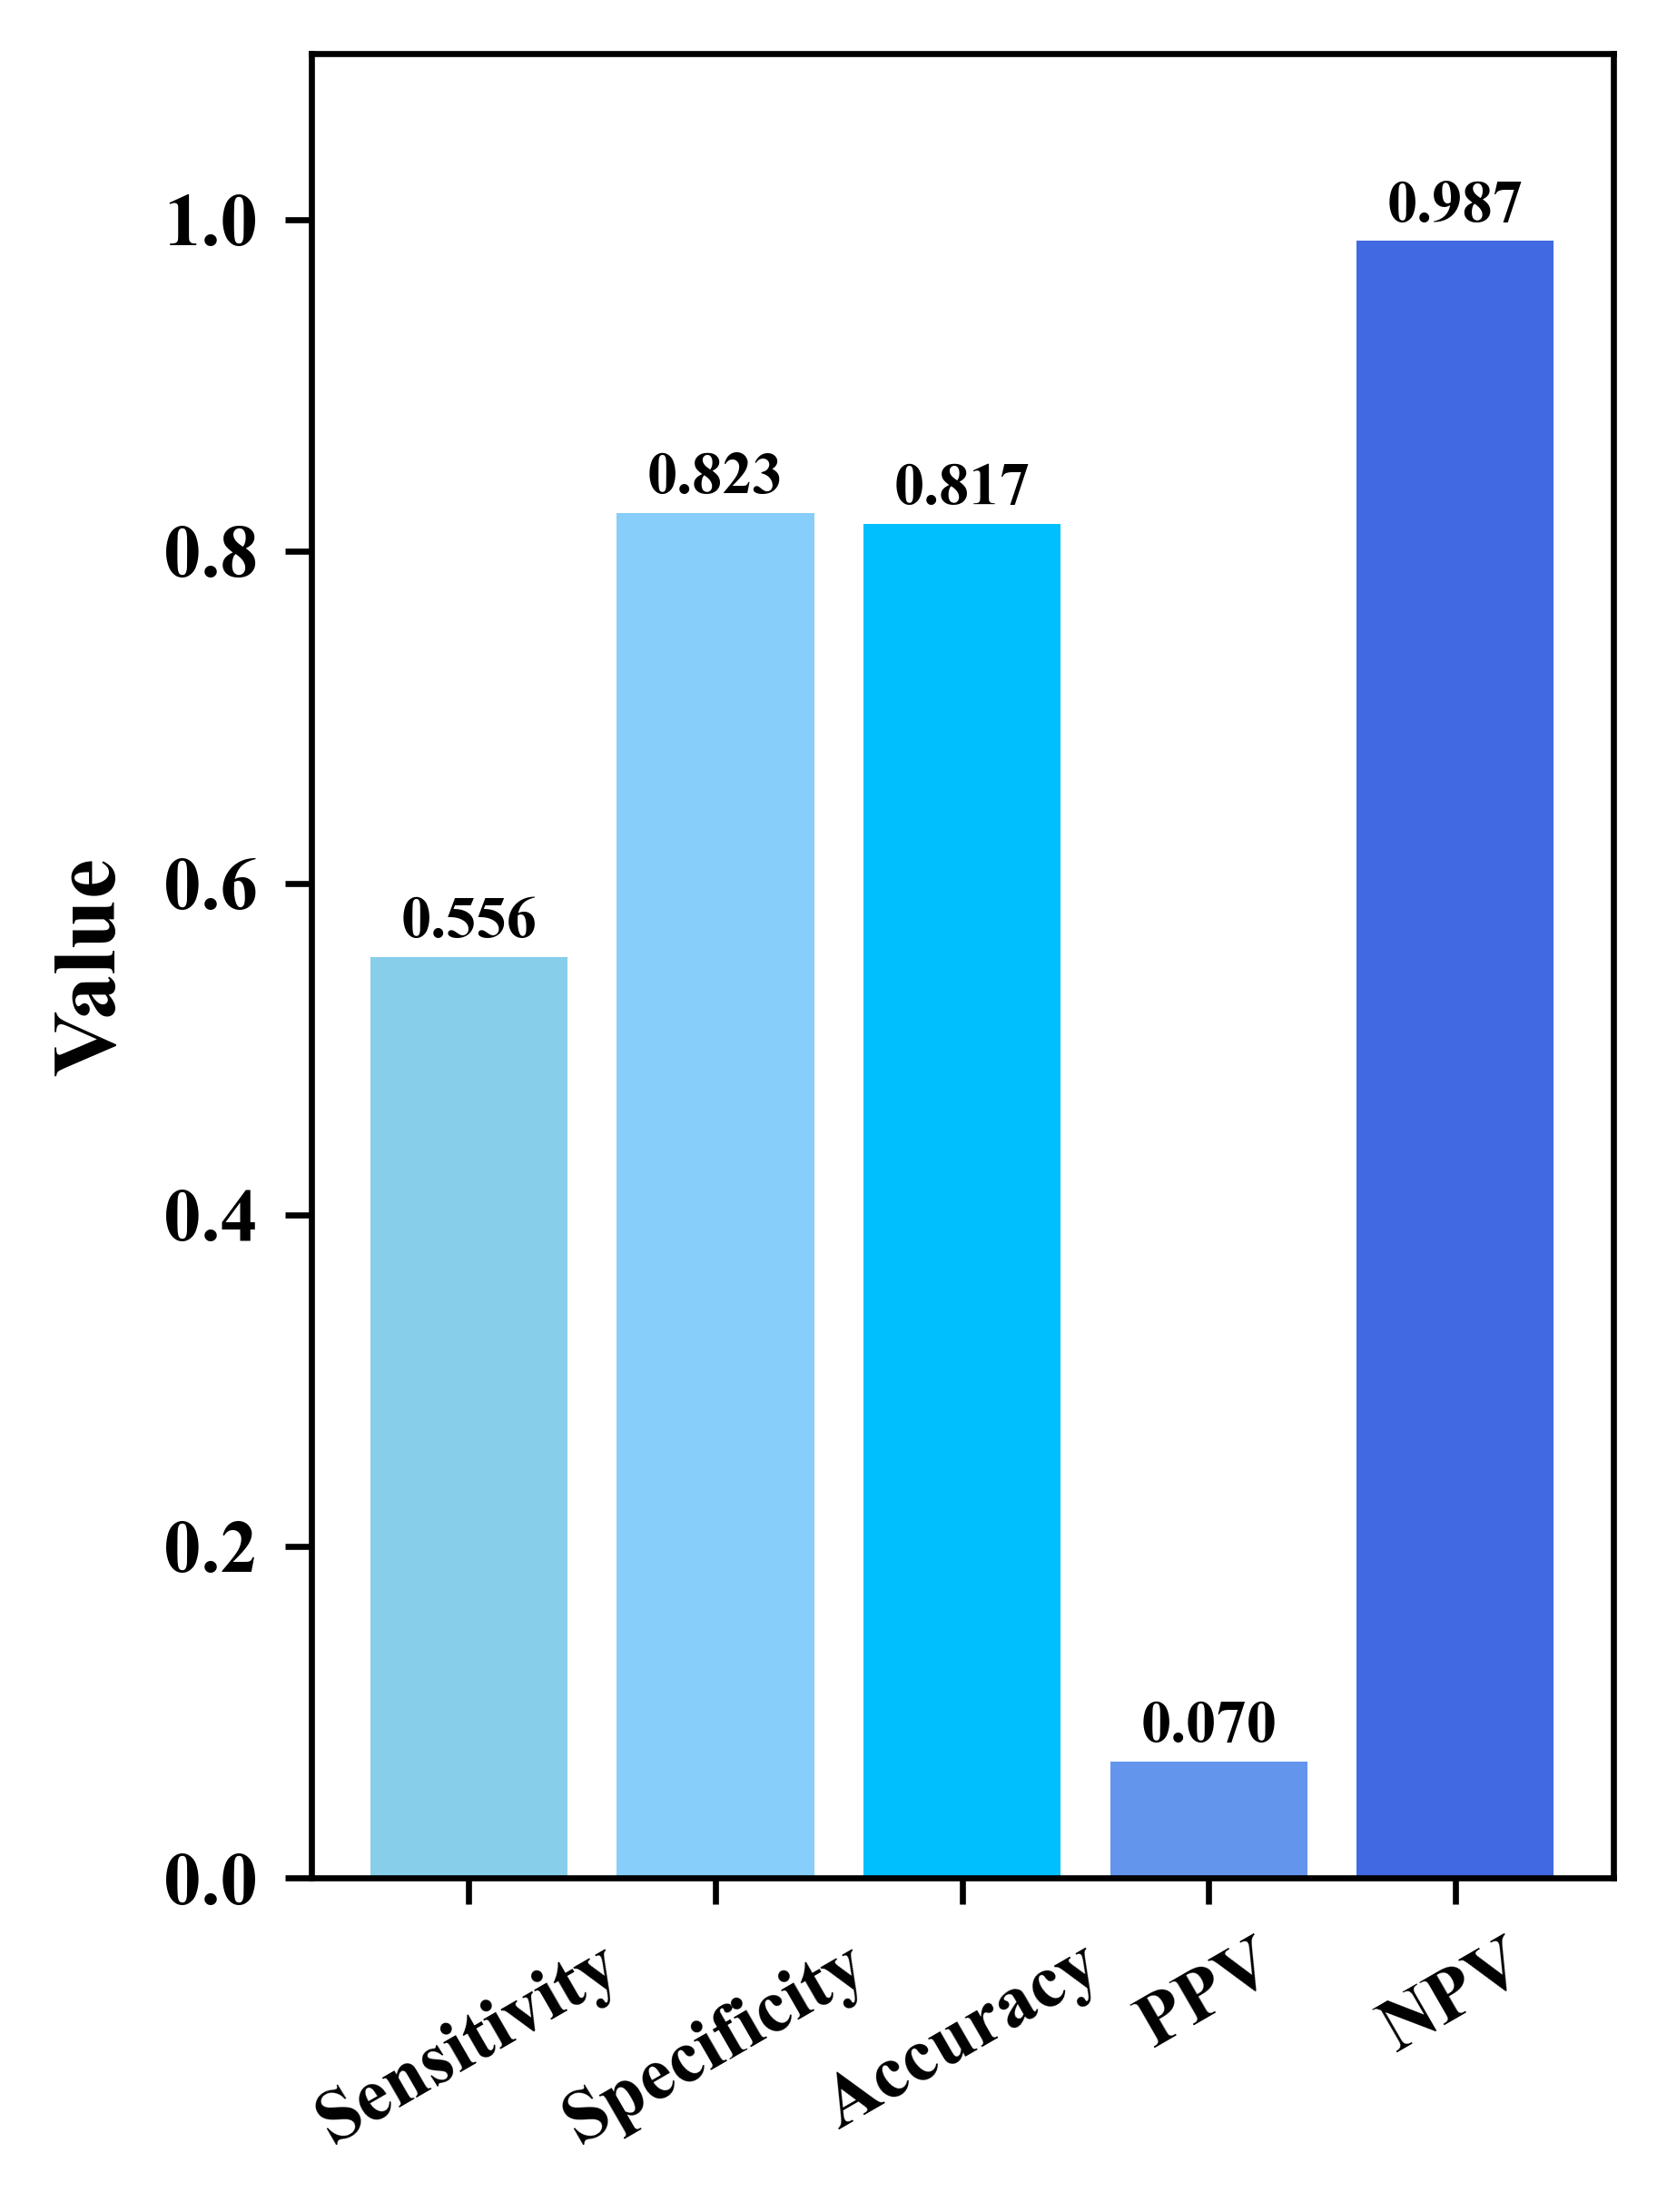

In [13]:
labels = ['Sensitivity', 'Specificity', 'Accuracy','PPV', 'NPV',]
values = [sensitivity, specificity, accuracy,ppv, npv]
colors = ['skyblue', 'lightskyblue', 'deepskyblue', 'cornflowerblue', 'royalblue'] 
fig, ax = plt.subplots(figsize=(3, 4), dpi=600)
bars = ax.bar(labels, values, color=colors)
ax.set_ylabel('Value',fontproperties = 'Times New Roman',weight='bold',fontsize=12)
plt.xticks(rotation=30,fontproperties = 'Times New Roman',weight='bold',fontsize=10,)
plt.yticks(fontproperties = 'Times New Roman',weight='bold',fontsize=10,)
plt.ylim(0,1.1)
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',fontproperties = 'Times New Roman',weight='bold',fontsize=8)

plt.tight_layout(pad=0.5)
plt.show()

Fig 3i

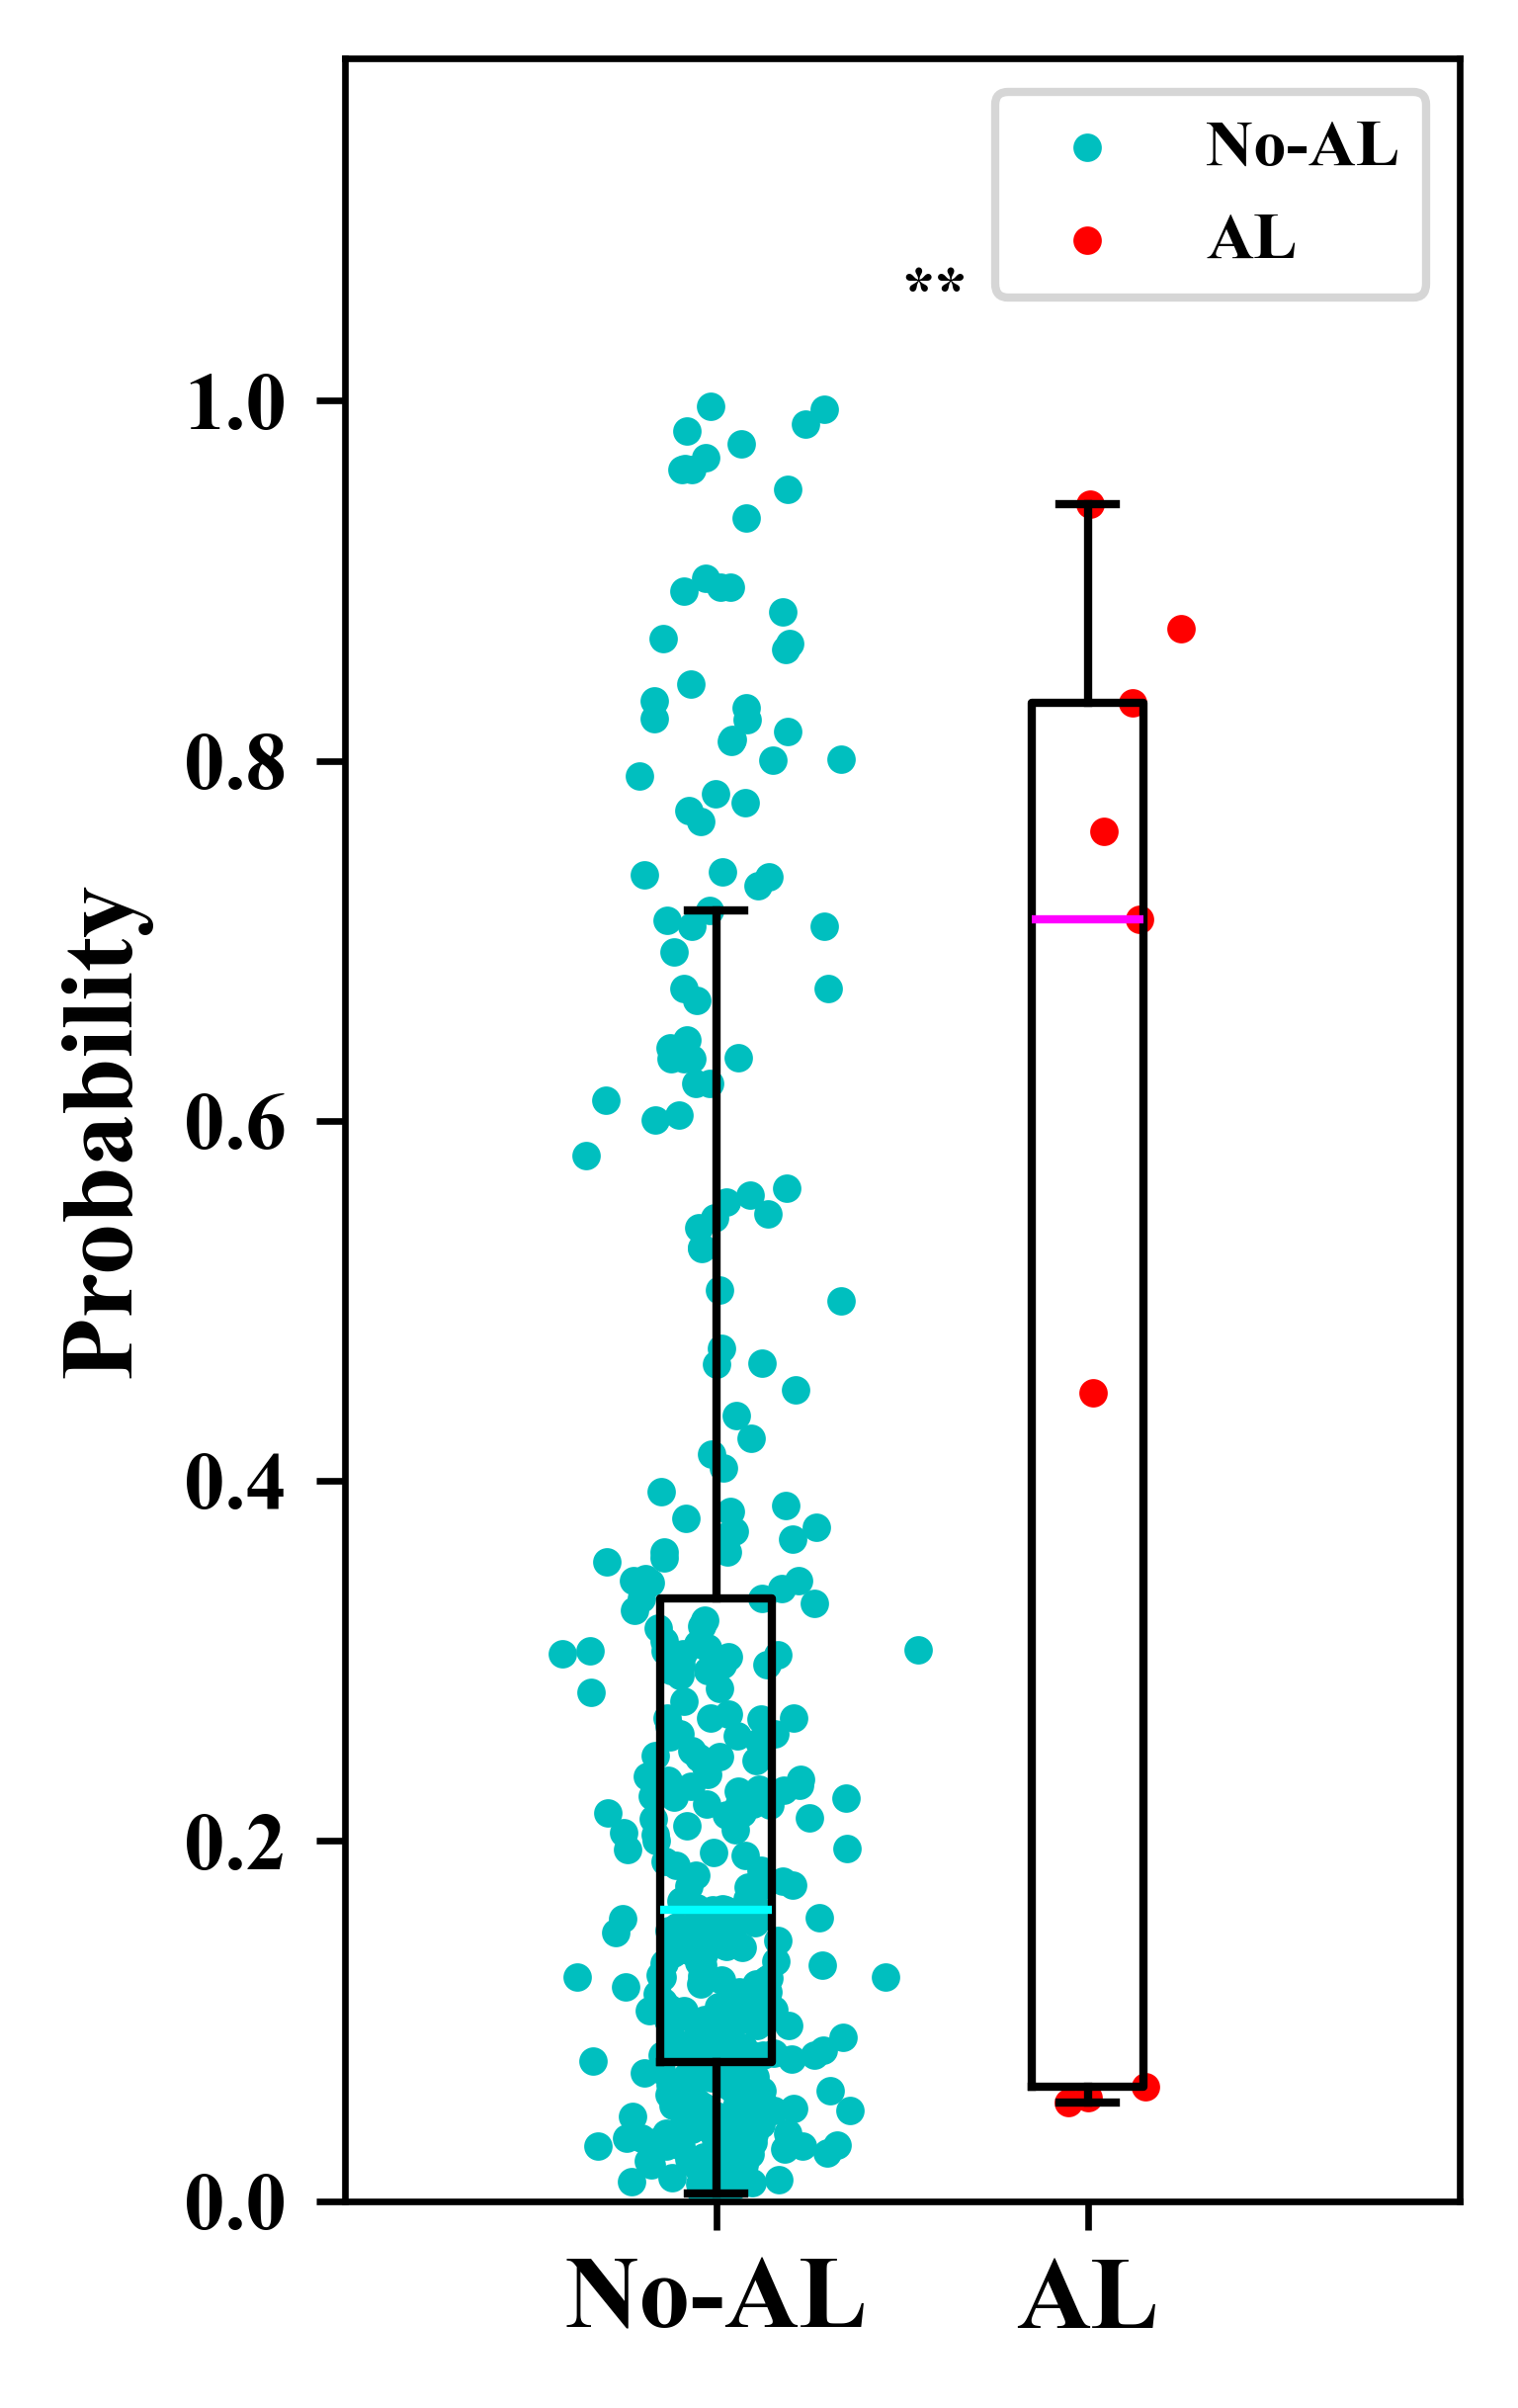

In [15]:
data1 = [df['proba'][df['al'] == 0], df['proba'][df['al'] == 1]]
positions = []
gap_between_pairs = 0.5 
for i in range(2):
    base_pos = i * gap_between_pairs + 1
    positions.append(base_pos)
plt.figure(figsize=(2.5, 4), dpi=600)
bp = plt.boxplot(data1, positions=positions, showfliers=False)
for patch in bp['boxes']:
    patch.set_color('black')
new_positions = positions
custom_labels = ['No-AL', 'AL']
plt.xticks(new_positions, custom_labels)
median_colors = ['cyan', 'magenta']
for i, median in enumerate(bp['medians']):
    median.set_color(median_colors[i % 2])
scatter_colors = ['c', 'red']

for i, d in enumerate(data1):
    x = np.random.normal(positions[i], 0.075, size=len(d))
    label = 'No-AL' if scatter_colors[i] == 'c' else 'AL'
    plt.scatter(x, d, color=scatter_colors[i], alpha=1, s=6, label=label if i < 2 else "")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # 去重
fontdict_prop = {'family': 'Times New Roman',
                 'weight': 'bold',
                 'size': 8,
                 }
plt.legend(by_label.values(), by_label.keys(), prop=fontdict_prop)
plt.ylabel('Probability', fontproperties='Times New Roman', fontsize=12.5, weight='bold')
plt.xticks(rotation=0,  fontproperties='Times New Roman', fontsize=12.5,weight='bold')
plt.yticks(rotation=0, fontsize=8, fontproperties='Times New Roman', weight='bold')
plt.ylim(0, 1.19)
plt.text(1.25,1.05, '**',rotation=0, fontsize=8, fontproperties='Times New Roman', weight='bold')
plt.tight_layout(pad=0.5)
plt.show()